
## Box Plots and Line Charts (Scores, LOC, D3, Survey)

>> Run correlation on overall improvement scores (Spearman Correlation)

>> Run the correlations per subgroup - to see if the picture changes there.

>> Examining the distribution of each metrics using histogram and normality test 




In [1]:
# retrive variables stored in other Jupyter notebooks

%store -r overall_loc_scores_final
%store -r overall_loc_scores

In [2]:
import pandas as pd
import numpy as np
from scipy import stats

In [3]:
overall_loc_scores = overall_loc_scores[overall_loc_scores['Group'].isnull() != True]
overall_loc_scores = overall_loc_scores.fillna(0)
overall_loc_scores

,Student,Group,user-requirement-phase5,infovis-phase5,novelty-phase5,total-phase5,tech-phase5,tech-phase4,user-requirement-phase4,infovis-phase4,...,add-loc-25,delete-loc-25,change-files-25,add-loc-sum,improve-effort-12,improve-effort-23,improve-effort-34,improve-effort-45,improve-effort-15,improve-effort-25
0,fffeelipe,0.0,20.0,29.17,50.00,199.17,100.0,100.0,20.0,29.17,...,0.0,0.0,0.0,165.0,0.0,0.0,-14.0,-6.0,-32.5,0.0
1,mnguzmanc,0.0,60.0,75.00,67.50,290.00,87.5,87.5,20.0,37.50,...,51.0,144.0,2.0,183.0,-1.0,-16.5,45.5,13.0,-29.0,-21.0
2,jmcuestasb,0.0,100.0,54.17,25.00,254.17,75.0,62.5,100.0,58.33,...,5.0,34.0,1.0,31.0,7.0,1.5,9.0,-4.0,7.0,-12.0
3,katherinsb,0.0,20.0,37.50,16.67,136.67,62.5,37.5,20.0,45.83,...,0.0,0.0,6.0,259.0,0.0,0.0,0.0,73.5,0.0,0.0
4,jjrodriguezn,0.0,60.0,58.33,87.50,255.83,50.0,37.5,40.0,54.17,...,59.0,49.0,5.0,232.0,104.0,8.0,60.5,0.5,0.0,34.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,NicolasPrr,3.0,100.0,83.33,90.00,360.83,87.5,62.5,0.0,33.33,...,41.0,49.0,5.0,108.0,0.0,0.0,-36.5,0.0,16.5,16.5
159,jumcorredorro,3.0,100.0,62.50,75.00,325.00,87.5,87.5,80.0,58.33,...,29.0,35.0,1.0,32.0,0.0,12.0,1.0,1.0,11.5,11.5
160,feartheGru,3.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,...,6.0,234.0,2.0,6.0,-33.5,0.0,0.0,0.0,0.0,-111.0
161,Danielsv9207,3.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
overall_loc_scores_group0 = overall_loc_scores[overall_loc_scores['Group'] == 0]
overall_loc_scores_group1 = overall_loc_scores[overall_loc_scores['Group'] == 1]
overall_loc_scores_group2 = overall_loc_scores[overall_loc_scores['Group'] == 2]
overall_loc_scores_group3 = overall_loc_scores[overall_loc_scores['Group'] == 3]

In [5]:
survey = overall_loc_scores_final[['Q2_Q2_1', 'Q2_Q2_2', 'Q2_Q2_3', 
                                   'Q2_Q2_4', 'Q2_Q2_5', 'Q2_Q2_6', 
                                   'Q2_Q2_7', 'Q2_Q2_8', 'Q2_Q2_9', 
                                   'Q2_Q2_10', 'Q2_Q2_11', 'Q2_Q2_12', 
                                   'Q2_Q2_13', 'Q3_Q3_1', 'Q3_Q3_2', 'Q3_Q3_3', 'Q3_Q3_4', 'Q3_Q3_5','Q4_Q4_1', 'Q4_Q4_2', 'Q4_Q4_3', 'Q4_Q4_4', 'Q4_Q4_5', 'Q5_Q5_1', 'Q5_Q5_2', 'Q5_Q5_3', 'Q5_Q5_4', 'Q5_Q5_5', 'Q7_Q7_1',
                                   'Q7_Q7_2', 'Q7_Q7_3', 'Q7_Q7_4', 'Q8_Q8_1', 'Q8_Q8_2','Q10','improve-tech-15','improve-ur-15','improve-vis-15', 'improve-novel-15', 'improve-total-15', 'improve-tech-45','improve-ur-45','improve-vis-45', 'improve-novel-45', 'improve-total-45'
                                ]]


survey.head(5)





,Q2_Q2_1,Q2_Q2_2,Q2_Q2_3,Q2_Q2_4,Q2_Q2_5,Q2_Q2_6,Q2_Q2_7,Q2_Q2_8,Q2_Q2_9,Q2_Q2_10,...,improve-tech-15,improve-ur-15,improve-vis-15,improve-novel-15,improve-total-15,improve-tech-45,improve-ur-45,improve-vis-45,improve-novel-45,improve-total-45
0,6.0,4.0,5.0,1.0,2.0,5.0,6.0,4.0,5.0,3.0,...,50.0,0.0,0.00,50.00,100.00,0.0,0.0,0.00,6.25,6.25
1,1.0,3.0,5.0,2.0,2.0,3.0,5.0,4.0,1.0,2.0,...,0.0,60.0,75.00,67.50,202.50,0.0,40.0,37.50,-32.50,45.00
2,4.0,6.0,4.0,3.0,5.0,6.0,5.0,5.0,6.0,6.0,...,25.0,100.0,54.17,25.00,204.17,12.5,0.0,-4.16,25.00,33.34
3,4.0,5.0,6.0,4.0,5.0,6.0,6.0,4.0,4.0,6.0,...,62.5,20.0,37.50,16.67,136.67,25.0,0.0,-8.33,-8.33,8.34
4,3.0,5.0,4.0,4.0,2.0,5.0,4.0,0.0,2.0,5.0,...,50.0,60.0,58.33,87.50,255.83,12.5,20.0,4.16,87.50,124.16


In [6]:
bogota_0_survey = overall_loc_scores_final[overall_loc_scores_final['Group'].isin([0])]
survey0 = bogota_0_survey[['Q2_Q2_1', 'Q2_Q2_2', 'Q2_Q2_3', 
                                   'Q2_Q2_4', 'Q2_Q2_5', 'Q2_Q2_6', 
                                   'Q2_Q2_7', 'Q2_Q2_8', 'Q2_Q2_9', 
                                   'Q2_Q2_10', 'Q2_Q2_11', 'Q2_Q2_12', 
                                   'Q2_Q2_13', 'Q3_Q3_1', 'Q3_Q3_2', 'Q3_Q3_3', 'Q3_Q3_4', 'Q3_Q3_5','Q4_Q4_1', 'Q4_Q4_2', 'Q4_Q4_3', 'Q4_Q4_4', 'Q4_Q4_5', 'Q5_Q5_1', 'Q5_Q5_2', 'Q5_Q5_3', 'Q5_Q5_4', 'Q5_Q5_5', 'Q7_Q7_1',
                                   'Q7_Q7_2', 'Q7_Q7_3', 'Q7_Q7_4', 'Q8_Q8_1', 'Q8_Q8_2','Q10','improve-tech-15','improve-ur-15','improve-vis-15', 'improve-novel-15', 'improve-total-15', 'improve-tech-45','improve-ur-45','improve-vis-45', 'improve-novel-45', 'improve-total-45'
                                ]]




In [7]:
bogota_1_survey = overall_loc_scores_final[overall_loc_scores_final['Group'].isin([1])]
survey1 = bogota_1_survey[['Q2_Q2_1', 'Q2_Q2_2', 'Q2_Q2_3', 
                                   'Q2_Q2_4', 'Q2_Q2_5', 'Q2_Q2_6', 
                                   'Q2_Q2_7', 'Q2_Q2_8', 'Q2_Q2_9', 
                                   'Q2_Q2_10', 'Q2_Q2_11', 'Q2_Q2_12', 
                                   'Q2_Q2_13', 'Q3_Q3_1', 'Q3_Q3_2', 'Q3_Q3_3', 'Q3_Q3_4', 'Q3_Q3_5','Q4_Q4_1', 'Q4_Q4_2', 'Q4_Q4_3', 'Q4_Q4_4', 'Q4_Q4_5', 'Q5_Q5_1', 'Q5_Q5_2', 'Q5_Q5_3', 'Q5_Q5_4', 'Q5_Q5_5', 'Q7_Q7_1',
                                   'Q7_Q7_2', 'Q7_Q7_3', 'Q7_Q7_4', 'Q8_Q8_1', 'Q8_Q8_2','Q10','improve-tech-15','improve-ur-15','improve-vis-15', 'improve-novel-15', 'improve-total-15', 'improve-tech-45','improve-ur-45','improve-vis-45', 'improve-novel-45', 'improve-total-45'
                                ]]

In [8]:
bogota_2_survey = overall_loc_scores_final[overall_loc_scores_final['Group'].isin([2])]
survey2 = bogota_2_survey[['Q2_Q2_1', 'Q2_Q2_2', 'Q2_Q2_3', 
                                   'Q2_Q2_4', 'Q2_Q2_5', 'Q2_Q2_6', 
                                   'Q2_Q2_7', 'Q2_Q2_8', 'Q2_Q2_9', 
                                   'Q2_Q2_10', 'Q2_Q2_11', 'Q2_Q2_12', 
                                   'Q2_Q2_13', 'Q3_Q3_1', 'Q3_Q3_2', 'Q3_Q3_3', 'Q3_Q3_4', 'Q3_Q3_5','Q4_Q4_1', 'Q4_Q4_2', 'Q4_Q4_3', 'Q4_Q4_4', 'Q4_Q4_5', 'Q5_Q5_1', 'Q5_Q5_2', 'Q5_Q5_3', 'Q5_Q5_4', 'Q5_Q5_5', 'Q7_Q7_1',
                                   'Q7_Q7_2', 'Q7_Q7_3', 'Q7_Q7_4', 'Q8_Q8_1', 'Q8_Q8_2','Q10','improve-tech-15','improve-ur-15','improve-vis-15', 'improve-novel-15', 'improve-total-15', 'improve-tech-45','improve-ur-45','improve-vis-45', 'improve-novel-45', 'improve-total-45'
                                ]]

In [9]:
bogota_3_survey = overall_loc_scores_final[overall_loc_scores_final['Group'].isin([3])]
survey3 = bogota_3_survey[['Q2_Q2_1', 'Q2_Q2_2', 'Q2_Q2_3', 
                                   'Q2_Q2_4', 'Q2_Q2_5', 'Q2_Q2_6', 
                                   'Q2_Q2_7', 'Q2_Q2_8', 'Q2_Q2_9', 
                                   'Q2_Q2_10', 'Q2_Q2_11', 'Q2_Q2_12', 
                                   'Q2_Q2_13', 'Q3_Q3_1', 'Q3_Q3_2', 'Q3_Q3_3', 'Q3_Q3_4', 'Q3_Q3_5','Q4_Q4_1', 'Q4_Q4_2', 'Q4_Q4_3', 'Q4_Q4_4', 'Q4_Q4_5', 'Q5_Q5_1', 'Q5_Q5_2', 'Q5_Q5_3', 'Q5_Q5_4', 'Q5_Q5_5', 'Q7_Q7_1',
                                   'Q7_Q7_2', 'Q7_Q7_3', 'Q7_Q7_4', 'Q8_Q8_1', 'Q8_Q8_2','Q10','improve-tech-15','improve-ur-15','improve-vis-15', 'improve-novel-15', 'improve-total-15', 'improve-tech-45','improve-ur-45','improve-vis-45', 'improve-novel-45', 'improve-total-45'
                                ]]

## Before Log Transform Tech Scores

## improve-tech-15 Box Plot

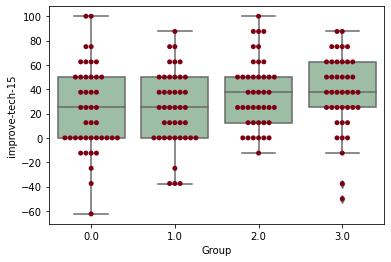

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='Group', y='improve-tech-15', data=overall_loc_scores_final, color='#99c2a2')
ax = sns.swarmplot(x="Group", y="improve-tech-15", data=overall_loc_scores_final, color='#7d0013')
plt.show()

>> Note: We want to have the linechart for each subgroups,   
   x-axis is the phases, 
   y-axis is the raw tech score, 
   legend we will have the groups   
   Interpretation: The 2 transparency conditions
   (2) and (3) seems to be improving more on tech. The median is higher. 

In [11]:
overall_loc_scores_final.groupby('Group', as_index=False)['tech-phase1'].mean()

,Group,tech-phase1
0,0.0,26.162791
1,1.0,40.476190
2,2.0,33.333333
3,3.0,36.585366


In [12]:
overall_loc_scores_final.groupby('Group', as_index=False)['tech-phase2'].mean()

,Group,tech-phase2
0,0.0,41.860465
1,1.0,58.333333
2,2.0,56.845238
3,3.0,60.365854


In [13]:
overall_loc_scores_final.groupby('Group', as_index=False)['tech-phase3'].mean()

,Group,tech-phase3
0,0.0,39.534884
1,1.0,57.440476
2,2.0,55.285714
3,3.0,60.060976


In [14]:
overall_loc_scores_final.groupby('Group', as_index=False)['tech-phase4'].mean()

,Group,tech-phase4
0,0.0,43.313953
1,1.0,61.607143
2,2.0,56.250000
3,3.0,64.634146


In [15]:
overall_loc_scores_final.groupby('Group', as_index=False)['tech-phase5'].mean()

,Group,tech-phase5
0,0.0,49.709302
1,1.0,64.880952
2,2.0,69.940476
3,3.0,73.780488


In [16]:
tech_phase5_bogota0 = overall_loc_scores_final[overall_loc_scores_final['Group'] == 0]['tech-phase5'].mean()

In [17]:
phase5_tech = []
phase4_tech = []
phase3_tech = []
phase2_tech = []
phase1_tech = []

phase5_tech_median = []
phase4_tech_median = []
phase3_tech_median = []
phase2_tech_median = []
phase1_tech_median = []

for i in range(4):
    phase5_tech.append(overall_loc_scores[overall_loc_scores['Group'] == i]['tech-phase5'].mean())
    phase5_tech_median.append(overall_loc_scores[overall_loc_scores['Group'] == i]['tech-phase5'].median())

for i in range(4):
    phase4_tech.append(overall_loc_scores[overall_loc_scores['Group'] == i]['tech-phase4'].mean())
    phase4_tech_median.append(overall_loc_scores[overall_loc_scores['Group'] == i]['tech-phase4'].median())

for i in range(4):
    phase3_tech.append(overall_loc_scores[overall_loc_scores['Group'] == i]['tech-phase3'].mean())
    phase3_tech_median.append(overall_loc_scores[overall_loc_scores['Group'] == i]['tech-phase3'].median())

for i in range(4):
    phase2_tech.append(overall_loc_scores[overall_loc_scores['Group'] == i]['tech-phase2'].mean())
    phase2_tech_median.append(overall_loc_scores[overall_loc_scores['Group'] == i]['tech-phase2'].median())
    
for i in range(4):
    phase1_tech.append(overall_loc_scores[overall_loc_scores['Group'] == i]['tech-phase1'].mean())
    phase1_tech_median.append(overall_loc_scores[overall_loc_scores['Group'] == i]['tech-phase1'].median())
    

<AxesSubplot:xlabel='tech-phase5', ylabel='Density'>

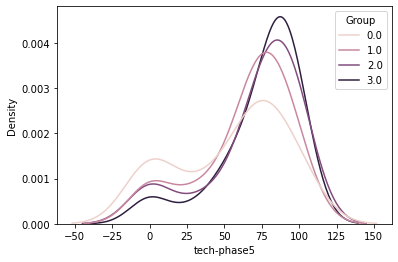

In [18]:
sns.kdeplot(data=overall_loc_scores, x='tech-phase5', hue='Group')

<AxesSubplot:xlabel='tech-phase4', ylabel='Density'>

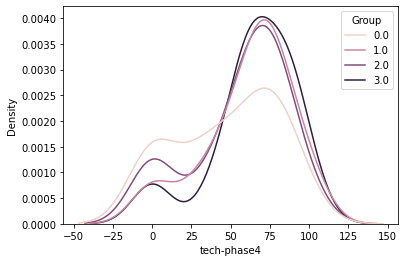

In [19]:
sns.kdeplot(data=overall_loc_scores, x='tech-phase4', hue='Group')

<AxesSubplot:xlabel='tech-phase3', ylabel='Density'>

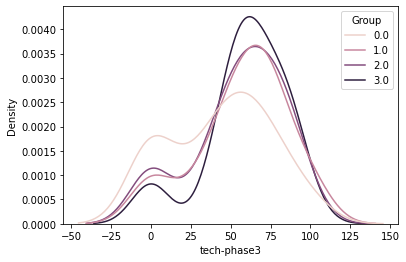

In [20]:
sns.kdeplot(data=overall_loc_scores, x='tech-phase3', hue='Group')

<AxesSubplot:xlabel='tech-phase2', ylabel='Density'>

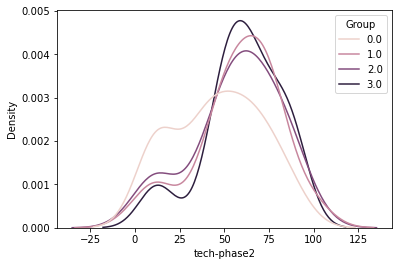

In [21]:
sns.kdeplot(data=overall_loc_scores, x='tech-phase2', hue='Group')

<AxesSubplot:xlabel='tech-phase1', ylabel='Density'>

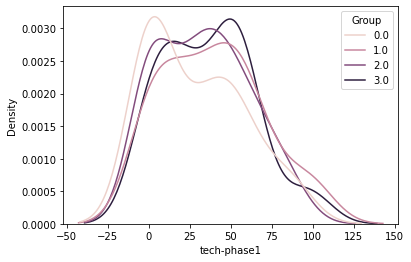

In [22]:
sns.kdeplot(data=overall_loc_scores, x='tech-phase1', hue='Group')

## improve-tech-15 line charts


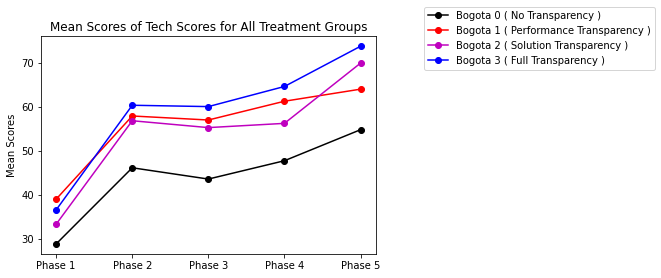

In [23]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Tech Scores ]

y1 = [phase1_tech[0], phase2_tech[0], phase3_tech[0], phase4_tech[0], phase5_tech[0] ]
y2 = [phase1_tech[1], phase2_tech[1], phase3_tech[1], phase4_tech[1], phase5_tech[1] ]
y3 = [phase1_tech[2], phase2_tech[2], phase3_tech[2], phase4_tech[2], phase5_tech[2] ]
y4 = [phase1_tech[3], phase2_tech[3], phase3_tech[3], phase4_tech[3], phase5_tech[3] ]

x_axis=['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5']

line1 = plt.plot(x_axis, y1,'ko-',label='Bogota 0 ( No Transparency )')
line2 = plt.plot(x_axis, y2,'ro-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'mo-',label='Bogota 2 ( Solution Transparency )')
line3 = plt.plot(x_axis, y4,'bo-',label='Bogota 3 ( Full Transparency )')

plt.title("Mean Scores of Tech Scores for All Treatment Groups")
plt.ylabel("Mean Scores")

plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)

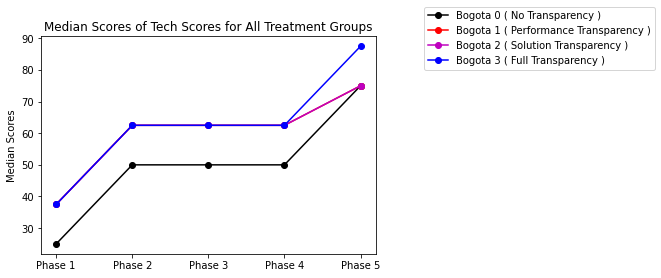

In [24]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Tech Scores ]

y1 = [phase1_tech_median[0], phase2_tech_median[0], phase3_tech_median[0], phase4_tech_median[0], phase5_tech_median[0] ]
y2 = [phase1_tech_median[1], phase2_tech_median[1], phase3_tech_median[1], phase4_tech_median[1], phase5_tech_median[1] ]
y3 = [phase1_tech_median[2], phase2_tech_median[2], phase3_tech_median[2], phase4_tech_median[2], phase5_tech_median[2] ]
y4 = [phase1_tech_median[3], phase2_tech_median[3], phase3_tech_median[3], phase4_tech_median[3], phase5_tech_median[3] ]

x_axis=['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5']

line1 = plt.plot(x_axis, y1,'ko-',label='Bogota 0 ( No Transparency )')
line2 = plt.plot(x_axis, y2,'ro-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'mo-',label='Bogota 2 ( Solution Transparency )')
line3 = plt.plot(x_axis, y4,'bo-',label='Bogota 3 ( Full Transparency )')

plt.title("Median Scores of Tech Scores for All Treatment Groups")
plt.ylabel("Median Scores")

plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)

## After Log-Transform Tech Scores

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

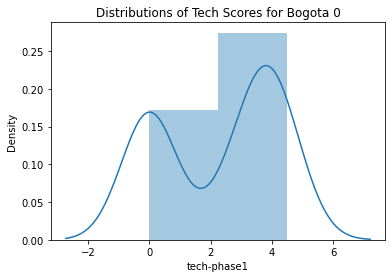

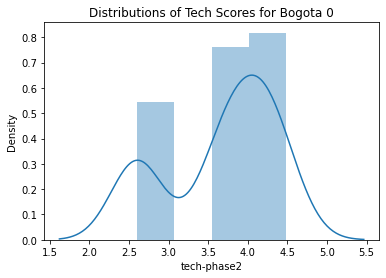

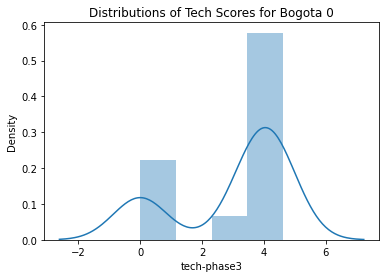

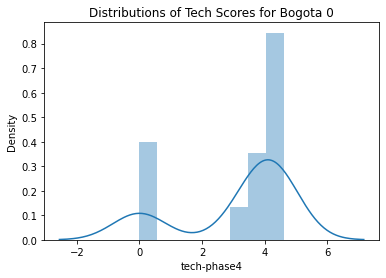

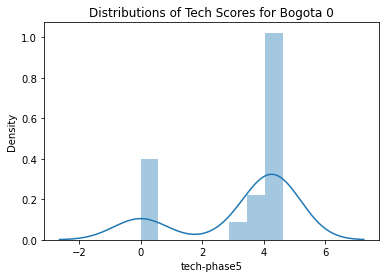

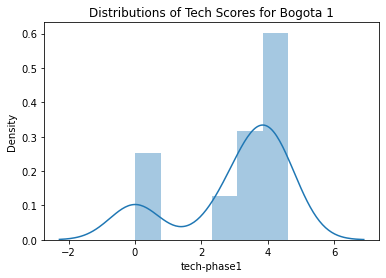

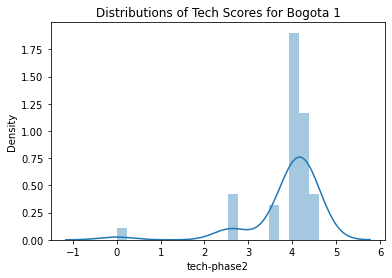

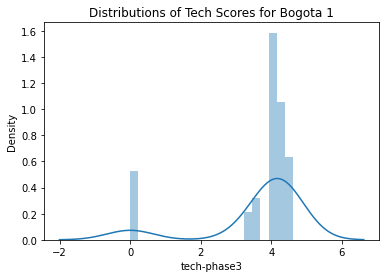

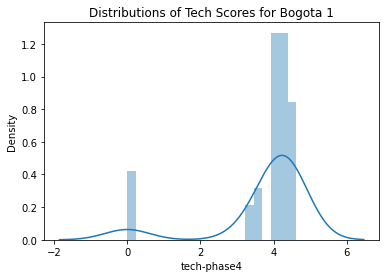

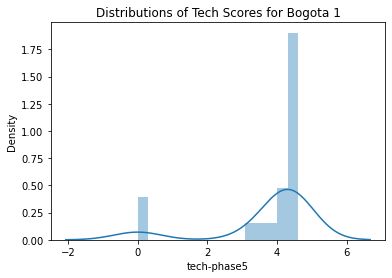

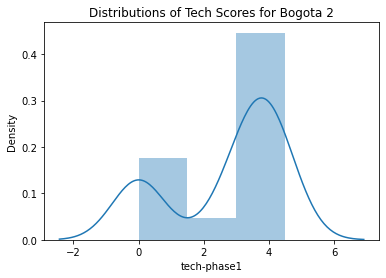

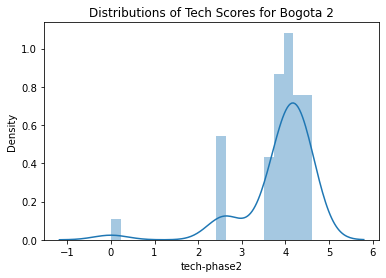

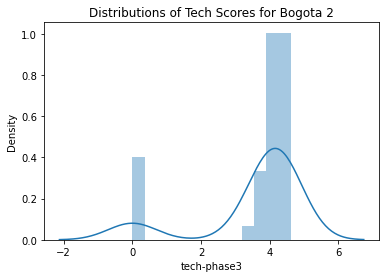

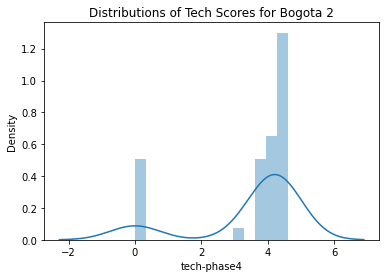

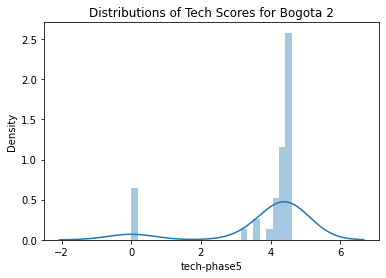

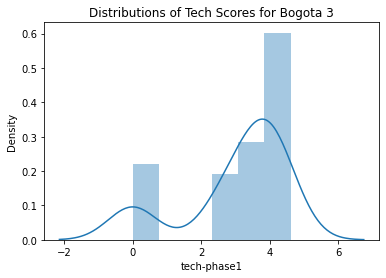

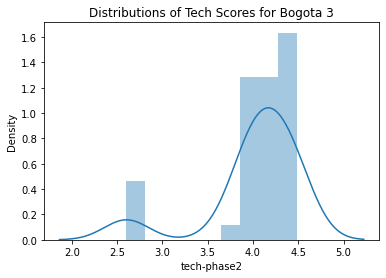

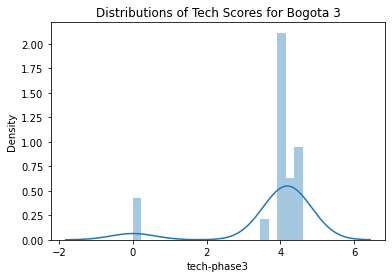

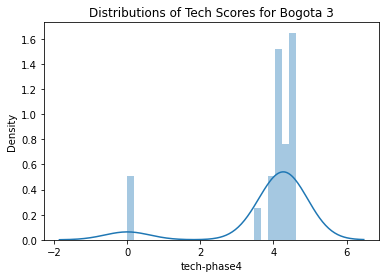

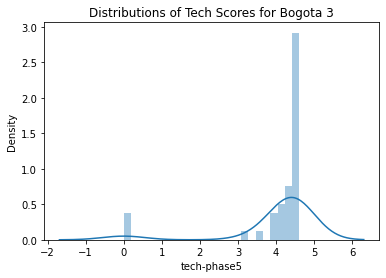

In [25]:
median_log_bogota3 = []
median_log_bogota2 = []
median_log_bogota1 = []
median_log_bogota0 = []

mean_log_bogota3 = []
mean_log_bogota2 = []
mean_log_bogota1 = []
mean_log_bogota0 = []

for df in [overall_loc_scores_group0['tech-phase1'], overall_loc_scores_group0['tech-phase2'], overall_loc_scores_group0['tech-phase3'], overall_loc_scores_group0['tech-phase4'], overall_loc_scores_group0['tech-phase5']]:
    median_value0 = np.log(df+1).median()
    median_log_bogota0.append(median_value0)
    mean_value0 = np.log(df+1).mean()
    mean_log_bogota0.append(mean_value0)
    plt.figure()
    plt.title("Distributions of Tech Scores for Bogota 0")
    sns.distplot(np.log(df+1))

for df in [overall_loc_scores_group1['tech-phase1'], overall_loc_scores_group1['tech-phase2'], overall_loc_scores_group1['tech-phase3'], overall_loc_scores_group1['tech-phase4'], overall_loc_scores_group1['tech-phase5']]:
    median_value1 = np.log(df+1).median()
    median_log_bogota1.append(median_value1)
    mean_value1 = np.log(df+1).mean()
    mean_log_bogota1.append(mean_value1)
    plt.figure()
    plt.title("Distributions of Tech Scores for Bogota 1")
    sns.distplot(np.log(df+1))
    
for df in [overall_loc_scores_group2['tech-phase1'], overall_loc_scores_group2['tech-phase2'], overall_loc_scores_group2['tech-phase3'], overall_loc_scores_group2['tech-phase4'], overall_loc_scores_group2['tech-phase5']]:
    median_value2 = np.log(df+1).median()
    median_log_bogota2.append(median_value2)
    mean_value2 = np.log(df+1).mean()
    mean_log_bogota2.append(mean_value2)
    plt.figure()
    plt.title("Distributions of Tech Scores for Bogota 2")
    sns.distplot(np.log(df+1))

for df in [overall_loc_scores_group3['tech-phase1'], overall_loc_scores_group3['tech-phase2'], overall_loc_scores_group3['tech-phase3'], overall_loc_scores_group3['tech-phase4'], overall_loc_scores_group3['tech-phase5']]:
    median_value3 = np.log(df+1).median()
    median_log_bogota3.append(median_value3)
    mean_value3 = np.log(df+1).mean()
    mean_log_bogota3.append(mean_value3)
    plt.figure()
    plt.title("Distributions of Tech Scores for Bogota 3")
    sns.distplot(np.log(df+1))

> Interpretation: Some of the plots are normal whereas the others are negatively skewed. 

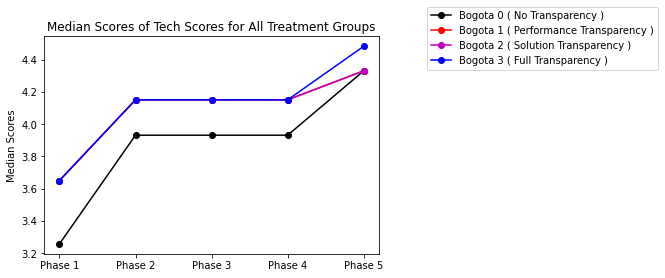

In [26]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Tech Scores ]

y1 = median_log_bogota0
y2 = median_log_bogota1
y3 = median_log_bogota2
y4 = median_log_bogota3


x_axis=['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5']

line1 = plt.plot(x_axis, y1,'ko-',label='Bogota 0 ( No Transparency )')
line2 = plt.plot(x_axis, y2,'ro-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'mo-',label='Bogota 2 ( Solution Transparency )')
line3 = plt.plot(x_axis, y4,'bo-',label='Bogota 3 ( Full Transparency )')

plt.title("Median Scores of Tech Scores for All Treatment Groups")
plt.ylabel("Median Scores")

plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)

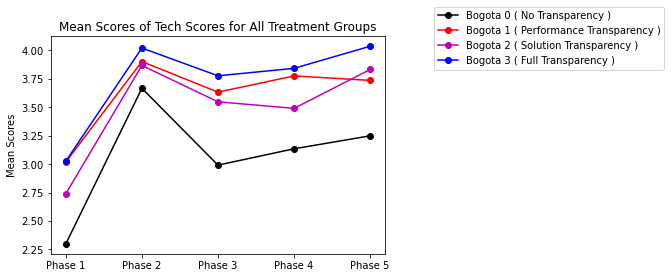

In [27]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Tech Scores ]

y1 = mean_log_bogota0
y2 = mean_log_bogota1
y3 = mean_log_bogota2
y4 = mean_log_bogota3


x_axis=['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5']

line1 = plt.plot(x_axis, y1,'ko-',label='Bogota 0 ( No Transparency )')
line2 = plt.plot(x_axis, y2,'ro-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'mo-',label='Bogota 2 ( Solution Transparency )')
line3 = plt.plot(x_axis, y4,'bo-',label='Bogota 3 ( Full Transparency )')

plt.title("Mean Scores of Tech Scores for All Treatment Groups")
plt.ylabel("Mean Scores")

plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)

> Interpretation: Distributions for tech scores is negatively skewed. 

## Before Log Transform Info Vis

## improve-vis-15 Box Plot

/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 7.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


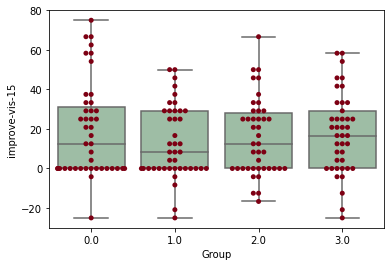

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='Group', y='improve-vis-15', data=overall_loc_scores_final, color='#99c2a2')
ax = sns.swarmplot(x="Group", y="improve-vis-15", data=overall_loc_scores_final, color='#7d0013')
plt.show()

>> Note: We want to have the linechart for each subgroups,   
   x-axis is the phases, 
   y-axis is the raw tech score, 
   legend we will have the groups   
   Interpretation: The baseline condition (1) seems to be highest in terms of improving on vis. Could be a skills.      effect. Check correlation with effort, LOC. 
   

In [29]:
overall_loc_scores_final.groupby('Group', as_index=False)['infovis-phase1'].mean()

,Group,infovis-phase1
0,0.0,13.275116
1,1.0,32.043571
2,2.0,26.389524
3,3.0,29.269024


In [30]:
overall_loc_scores_final.groupby('Group', as_index=False)['infovis-phase2'].mean()

,Group,infovis-phase2
0,0.0,23.642791
1,1.0,34.721667
2,2.0,29.761905
3,3.0,33.129512


In [31]:
overall_loc_scores_final.groupby('Group', as_index=False)['infovis-phase3'].mean()

,Group,infovis-phase3
0,0.0,28.197674
1,1.0,38.392143
2,2.0,35.415952
3,3.0,36.584634


In [32]:
overall_loc_scores_final.groupby('Group', as_index=False)['infovis-phase4'].mean()

,Group,infovis-phase4
0,0.0,29.554186
1,1.0,43.055476
2,2.0,36.606905
3,3.0,35.670000


In [33]:
overall_loc_scores_final.groupby('Group', as_index=False)['infovis-phase5'].mean()

,Group,infovis-phase5
0,0.0,32.752093
1,1.0,44.940476
2,2.0,42.162381
3,3.0,47.051951


<AxesSubplot:xlabel='infovis-phase5', ylabel='Density'>

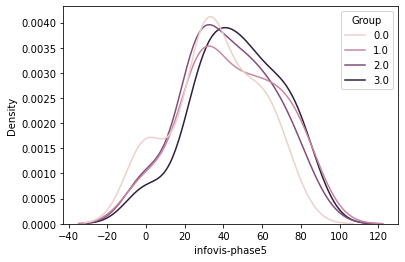

In [34]:
sns.kdeplot(data=overall_loc_scores, x='infovis-phase5', hue='Group')

<AxesSubplot:xlabel='infovis-phase4', ylabel='Density'>

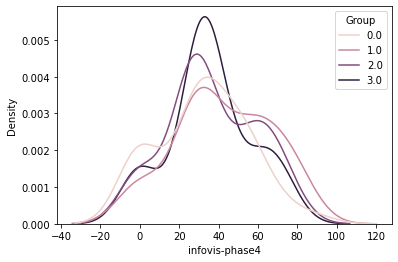

In [35]:
sns.kdeplot(data=overall_loc_scores, x='infovis-phase4', hue='Group')

<AxesSubplot:xlabel='infovis-phase3', ylabel='Density'>

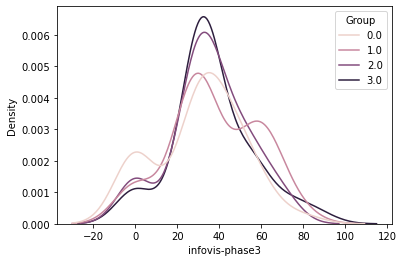

In [36]:
sns.kdeplot(data=overall_loc_scores, x='infovis-phase3', hue='Group')

<AxesSubplot:xlabel='infovis-phase2', ylabel='Density'>

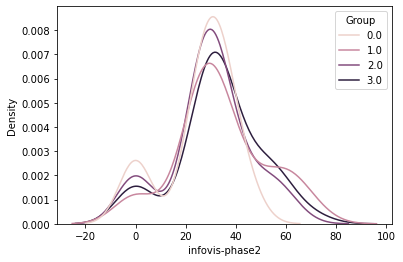

In [37]:
sns.kdeplot(data=overall_loc_scores, x='infovis-phase2', hue='Group')

<AxesSubplot:xlabel='infovis-phase1', ylabel='Density'>

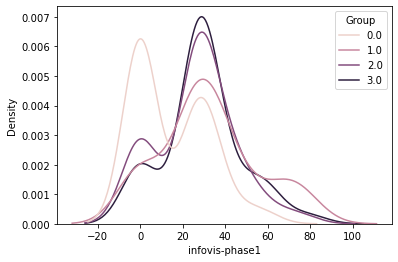

In [38]:
sns.kdeplot(data=overall_loc_scores, x='infovis-phase1', hue='Group')

In [39]:
phase5_infovis = []
phase4_infovis = []
phase3_infovis = []
phase2_infovis = []
phase1_infovis = []

phase5_infovis_median = []
phase4_infovis_median = []
phase3_infovis_median = []
phase2_infovis_median = []
phase1_infovis_median = []

for i in range(4):
    phase5_infovis.append(overall_loc_scores[overall_loc_scores['Group'] == i]['infovis-phase5'].mean())
    phase5_infovis_median.append(overall_loc_scores[overall_loc_scores['Group'] == i]['infovis-phase5'].median())

for i in range(4):
    phase4_infovis.append(overall_loc_scores[overall_loc_scores['Group'] == i]['infovis-phase4'].mean())
    phase4_infovis_median.append(overall_loc_scores[overall_loc_scores['Group'] == i]['infovis-phase4'].median())

for i in range(4):
    phase3_infovis.append(overall_loc_scores[overall_loc_scores['Group'] == i]['infovis-phase3'].mean())
    phase3_infovis_median.append(overall_loc_scores[overall_loc_scores['Group'] == i]['infovis-phase3'].median())

for i in range(4):
    phase2_infovis.append(overall_loc_scores[overall_loc_scores['Group'] == i]['infovis-phase2'].mean())
    phase2_infovis_median.append(overall_loc_scores[overall_loc_scores['Group'] == i]['infovis-phase2'].median())
    
for i in range(4):
    phase1_infovis.append(overall_loc_scores[overall_loc_scores['Group'] == i]['infovis-phase1'].mean())
    phase1_infovis_median.append(overall_loc_scores[overall_loc_scores['Group'] == i]['infovis-phase1'].median())

## improve-vis-15 line charts

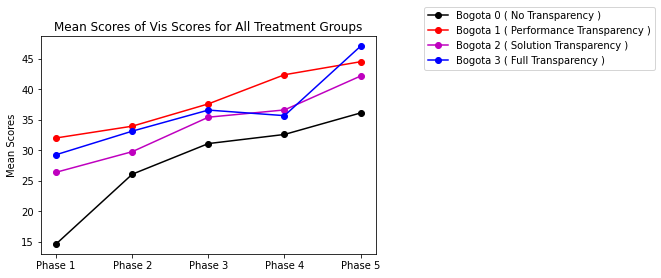

In [40]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [Vis Scores ]

y1 = [phase1_infovis[0], phase2_infovis[0], phase3_infovis[0], phase4_infovis[0], phase5_infovis[0] ]
y2 = [phase1_infovis[1], phase2_infovis[1], phase3_infovis[1], phase4_infovis[1], phase5_infovis[1] ]
y3 = [phase1_infovis[2], phase2_infovis[2], phase3_infovis[2], phase4_infovis[2], phase5_infovis[2] ]
y4 = [phase1_infovis[3], phase2_infovis[3], phase3_infovis[3], phase4_infovis[3], phase5_infovis[3] ]

x_axis=['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5']

line1 = plt.plot(x_axis, y1,'ko-',label='Bogota 0 ( No Transparency )')
line2 = plt.plot(x_axis, y2,'ro-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'mo-',label='Bogota 2 ( Solution Transparency )')
line3 = plt.plot(x_axis, y4,'bo-',label='Bogota 3 ( Full Transparency )')

plt.title("Mean Scores of Vis Scores for All Treatment Groups")
plt.ylabel("Mean Scores")

plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)

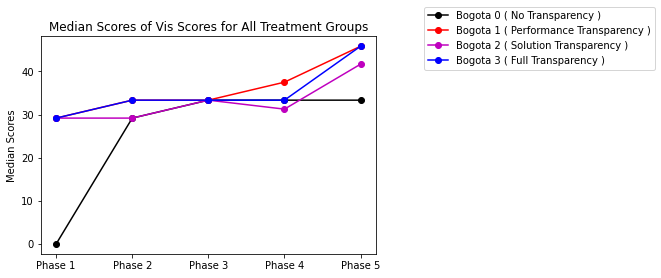

In [41]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [Vis Scores ]

y1 = [phase1_infovis_median[0], phase2_infovis_median[0], phase3_infovis_median[0], phase4_infovis_median[0], phase5_infovis_median[0] ]
y2 = [phase1_infovis_median[1], phase2_infovis_median[1], phase3_infovis_median[1], phase4_infovis_median[1], phase5_infovis_median[1] ]
y3 = [phase1_infovis_median[2], phase2_infovis_median[2], phase3_infovis_median[2], phase4_infovis_median[2], phase5_infovis_median[2] ]
y4 = [phase1_infovis_median[3], phase2_infovis_median[3], phase3_infovis_median[3], phase4_infovis_median[3], phase5_infovis_median[3] ]

x_axis=['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5']

line1 = plt.plot(x_axis, y1,'ko-',label='Bogota 0 ( No Transparency )')
line2 = plt.plot(x_axis, y2,'ro-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'mo-',label='Bogota 2 ( Solution Transparency )')
line3 = plt.plot(x_axis, y4,'bo-',label='Bogota 3 ( Full Transparency )')

plt.title("Median Scores of Vis Scores for All Treatment Groups")
plt.ylabel("Median Scores")

plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)

## T-tests Infovis

In [43]:
from itertools import combinations
from scipy import stats as st

df = overall_loc_scores[['Group','infovis-phase1', 'infovis-phase2', 'infovis-phase3', 'infovis-phase4', 'infovis-phase5']]

def all_pairwise(df, compare_col = 'Group'):
    decade_pairs = [(i,j) for i, j in combinations(df[compare_col].unique().tolist(), 2)]
    # or add a list of colnames to function signature
    cols = list(df.columns)
    cols.remove(compare_col)
    list_of_dfs = []
    for pair in decade_pairs:
        for col in cols:
            c1 = df[df[compare_col] == pair[0]][col]
            c2 = df[df[compare_col] == pair[1]][col]
            results = st.ttest_ind(c1, c2, nan_policy='omit')
            tmp = pd.DataFrame({'group1': pair[0],
                                'group2': pair[1],
                                'tstat': results.statistic,
                                'pvalue': results.pvalue}, index = [col])
            list_of_dfs.append(tmp)
    df_stats = pd.concat(list_of_dfs)
    return df_stats

df_stats = all_pairwise(df)
df_stats

,group1,group2,tstat,pvalue
infovis-phase1,0.0,1.0,-3.869610,0.000225
infovis-phase2,0.0,1.0,-2.221372,0.029226
infovis-phase3,0.0,1.0,-1.397776,0.166143
infovis-phase4,0.0,1.0,-1.868889,0.065392
infovis-phase5,0.0,1.0,-1.606529,0.112199
infovis-phase1,0.0,2.0,-2.974035,0.003896
infovis-phase2,0.0,2.0,-1.123692,0.264547
infovis-phase3,0.0,2.0,-0.998864,0.320910
infovis-phase4,0.0,2.0,-0.803210,0.424264
infovis-phase5,0.0,2.0,-1.207438,0.230866


## After Log-Transform Infovis scores

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

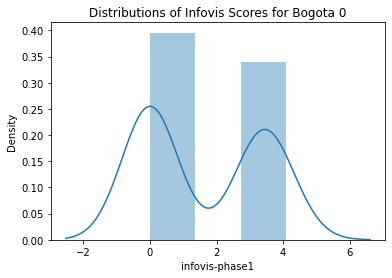

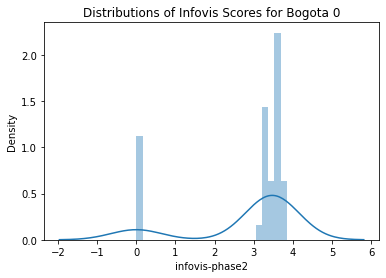

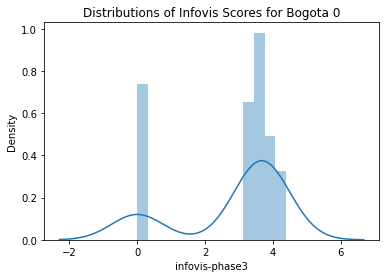

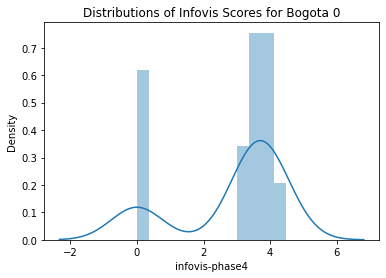

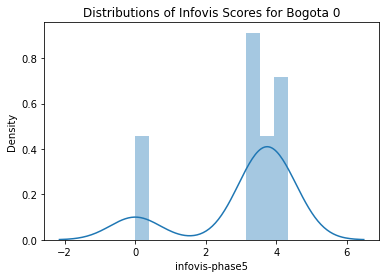

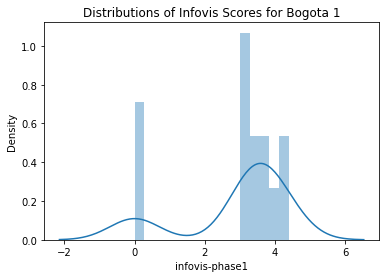

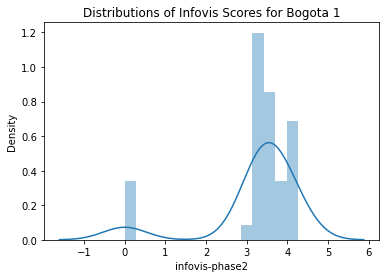

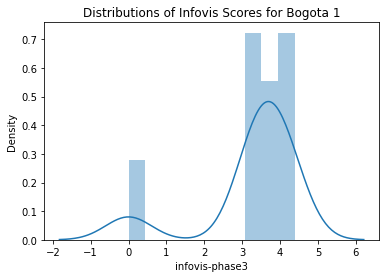

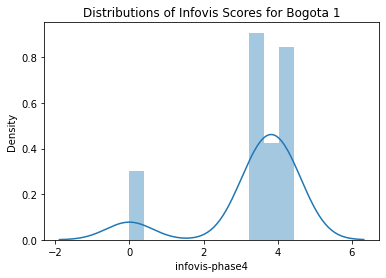

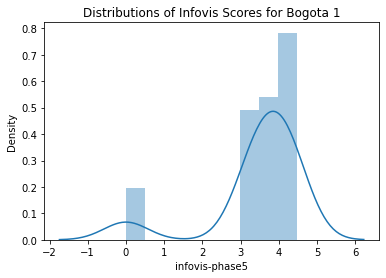

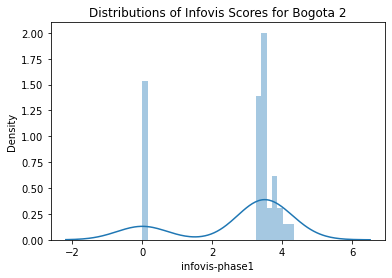

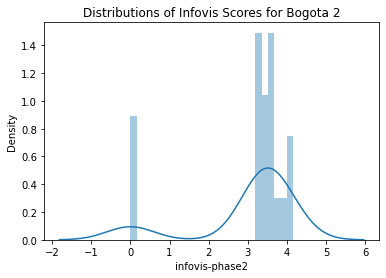

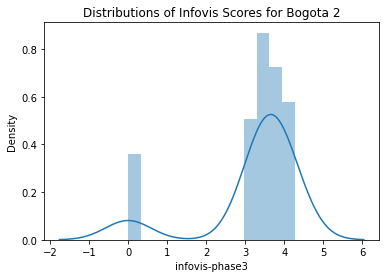

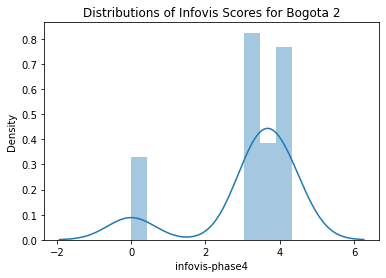

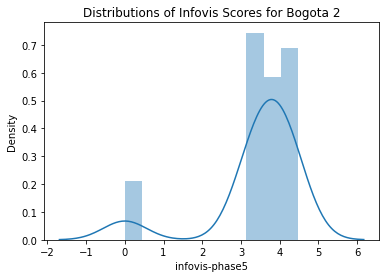

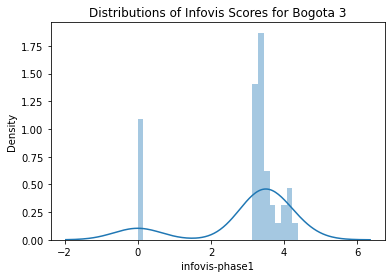

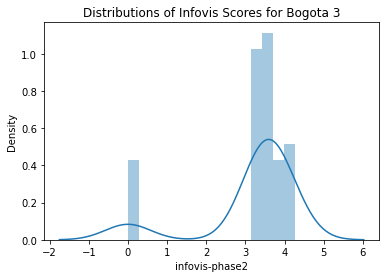

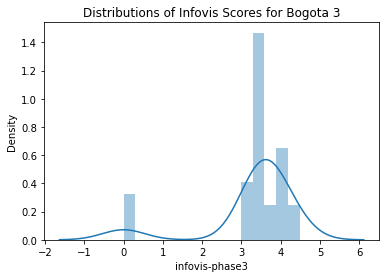

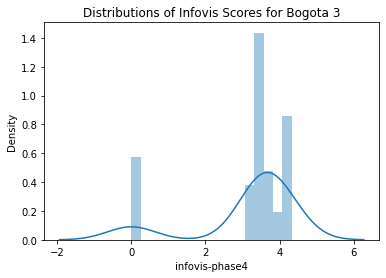

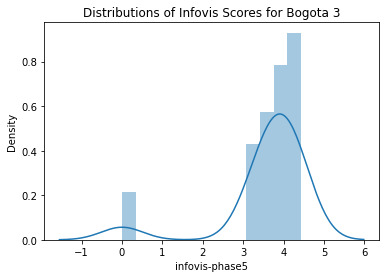

In [44]:
median_log_bogota3 = []
median_log_bogota2 = []
median_log_bogota1 = []
median_log_bogota0 = []

mean_log_bogota3 = []
mean_log_bogota2 = []
mean_log_bogota1 = []
mean_log_bogota0 = []

for df in [overall_loc_scores_group0['infovis-phase1'], overall_loc_scores_group0['infovis-phase2'], overall_loc_scores_group0['infovis-phase3'], overall_loc_scores_group0['infovis-phase4'], overall_loc_scores_group0['infovis-phase5']]:
    median_value0 = np.log(df+1).median()
    median_log_bogota0.append(median_value0)
    mean_value0 = np.log(df+1).mean()
    mean_log_bogota0.append(mean_value0)
    plt.figure()
    plt.title("Distributions of Infovis Scores for Bogota 0")
    sns.distplot(np.log(df+1))

for df in [overall_loc_scores_group1['infovis-phase1'], overall_loc_scores_group1['infovis-phase2'], overall_loc_scores_group1['infovis-phase3'], overall_loc_scores_group1['infovis-phase4'], overall_loc_scores_group1['infovis-phase5']]:
    median_value1 = np.log(df+1).median()
    median_log_bogota1.append(median_value1)
    mean_value1 = np.log(df+1).mean()
    mean_log_bogota1.append(mean_value1)
    plt.figure()
    plt.title("Distributions of Infovis Scores for Bogota 1")
    sns.distplot(np.log(df+1))
    
for df in [overall_loc_scores_group2['infovis-phase1'], overall_loc_scores_group2['infovis-phase2'], overall_loc_scores_group2['infovis-phase3'], overall_loc_scores_group2['infovis-phase4'], overall_loc_scores_group2['infovis-phase5']]:
    median_value2 = np.log(df+1).median()
    median_log_bogota2.append(median_value2)
    mean_value2 = np.log(df+1).mean()
    mean_log_bogota2.append(mean_value2)
    plt.figure()
    plt.title("Distributions of Infovis Scores for Bogota 2")
    sns.distplot(np.log(df+1))

for df in [overall_loc_scores_group3['infovis-phase1'], overall_loc_scores_group3['infovis-phase2'], overall_loc_scores_group3['infovis-phase3'], overall_loc_scores_group3['infovis-phase4'], overall_loc_scores_group3['infovis-phase5']]:
    median_value3 = np.log(df+1).median()
    median_log_bogota3.append(median_value3)
    mean_value3 = np.log(df+1).mean()
    mean_log_bogota3.append(mean_value3)
    plt.figure()
    plt.title("Distributions of Infovis Scores for Bogota 3")
    sns.distplot(np.log(df+1))

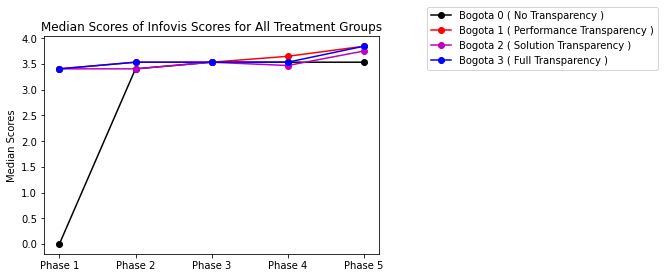

In [45]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Tech Scores ]

y1 = median_log_bogota0
y2 = median_log_bogota1
y3 = median_log_bogota2
y4 = median_log_bogota3


x_axis=['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5']

line1 = plt.plot(x_axis, y1,'ko-',label='Bogota 0 ( No Transparency )')
line2 = plt.plot(x_axis, y2,'ro-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'mo-',label='Bogota 2 ( Solution Transparency )')
line3 = plt.plot(x_axis, y4,'bo-',label='Bogota 3 ( Full Transparency )')

plt.title("Median Scores of Infovis Scores for All Treatment Groups")
plt.ylabel("Median Scores")

plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)

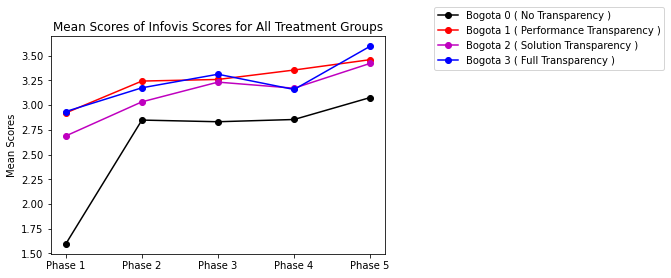

In [46]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Tech Scores ]

y1 = mean_log_bogota0
y2 = mean_log_bogota1
y3 = mean_log_bogota2
y4 = mean_log_bogota3


x_axis=['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5']

line1 = plt.plot(x_axis, y1,'ko-',label='Bogota 0 ( No Transparency )')
line2 = plt.plot(x_axis, y2,'ro-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'mo-',label='Bogota 2 ( Solution Transparency )')
line3 = plt.plot(x_axis, y4,'bo-',label='Bogota 3 ( Full Transparency )')

plt.title("Mean Scores of Infovis Scores for All Treatment Groups")
plt.ylabel("Mean Scores")

plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)

## Before Log-Transform User Requirement Score

## improve-ur-15 Box Plot

/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 16.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 21.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


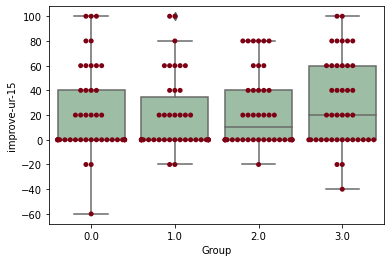

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='Group', y='improve-ur-15', data=overall_loc_scores_final, color='#99c2a2')
ax = sns.swarmplot(x="Group", y="improve-ur-15", data=overall_loc_scores_final, color='#7d0013')
plt.show()

In [48]:
overall_loc_scores_final.groupby('Group', as_index=False)['user-requirement-phase1'].mean()

,Group,user-requirement-phase1
0,0.0,7.906977
1,1.0,20.952381
2,2.0,14.285714
3,3.0,17.073171


In [49]:
overall_loc_scores_final.groupby('Group', as_index=False)['user-requirement-phase2'].mean()

,Group,user-requirement-phase2
0,0.0,12.093023
1,1.0,25.238095
2,2.0,21.428571
3,3.0,27.804878


In [50]:
overall_loc_scores_final.groupby('Group', as_index=False)['user-requirement-phase3'].mean()

,Group,user-requirement-phase3
0,0.0,22.325581
1,1.0,33.809524
2,2.0,29.523810
3,3.0,29.268293


In [51]:
overall_loc_scores_final.groupby('Group', as_index=False)['user-requirement-phase4'].mean()

,Group,user-requirement-phase4
0,0.0,20.930233
1,1.0,37.619048
2,2.0,33.333333
3,3.0,33.170732


In [52]:
overall_loc_scores_final.groupby('Group', as_index=False)['user-requirement-phase5'].mean()

,Group,user-requirement-phase5
0,0.0,29.767442
1,1.0,40.000000
2,2.0,37.619048
3,3.0,46.341463


In [53]:
phase5_ur  = []
phase4_ur  = []
phase3_ur  = []
phase2_ur  = []
phase1_ur  = []

phase5_ur_median = []
phase4_ur_median = []
phase3_ur_median = []
phase2_ur_median = []
phase1_ur_median = []

for i in range(4):
    phase5_ur.append(overall_loc_scores[overall_loc_scores['Group'] == i]['user-requirement-phase5'].mean())
    phase5_ur_median.append(overall_loc_scores[overall_loc_scores['Group'] == i]['user-requirement-phase5'].median())

for i in range(4):
    phase4_ur.append(overall_loc_scores[overall_loc_scores['Group'] == i]['user-requirement-phase4'].mean())
    phase4_ur_median.append(overall_loc_scores[overall_loc_scores['Group'] == i]['user-requirement-phase4'].median())

for i in range(4):
    phase3_ur.append(overall_loc_scores[overall_loc_scores['Group'] == i]['user-requirement-phase3'].mean())
    phase3_ur_median.append(overall_loc_scores[overall_loc_scores['Group'] == i]['user-requirement-phase3'].median())

for i in range(4):
    phase2_ur.append(overall_loc_scores[overall_loc_scores['Group'] == i]['user-requirement-phase2'].mean())
    phase2_ur_median.append(overall_loc_scores[overall_loc_scores['Group'] == i]['user-requirement-phase2'].median())
    
for i in range(4):
    phase1_ur.append(overall_loc_scores[overall_loc_scores['Group'] == i]['user-requirement-phase1'].mean())
    phase1_ur_median.append(overall_loc_scores[overall_loc_scores['Group'] == i]['user-requirement-phase1'].median())
    

<AxesSubplot:xlabel='user-requirement-phase5', ylabel='Density'>

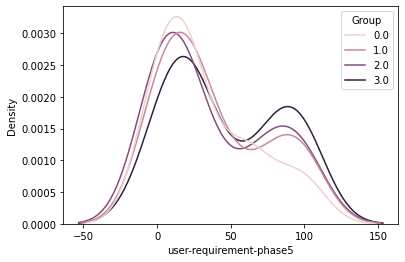

In [54]:
sns.kdeplot(data=overall_loc_scores, x='user-requirement-phase5', hue='Group')

<AxesSubplot:xlabel='user-requirement-phase4', ylabel='Density'>

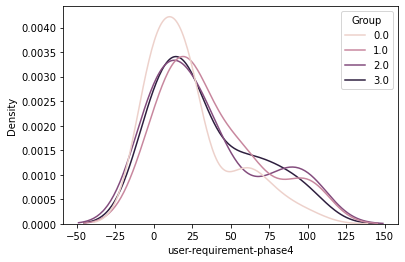

In [55]:
sns.kdeplot(data=overall_loc_scores, x='user-requirement-phase4', hue='Group')

<AxesSubplot:xlabel='user-requirement-phase3', ylabel='Density'>

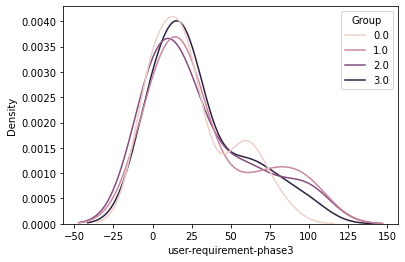

In [56]:
sns.kdeplot(data=overall_loc_scores, x='user-requirement-phase3', hue='Group')

<AxesSubplot:xlabel='user-requirement-phase2', ylabel='Density'>

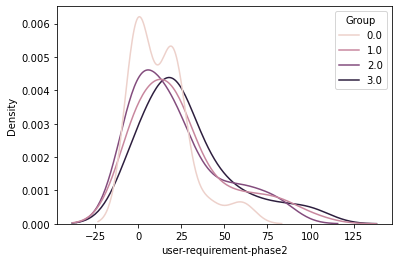

In [57]:
sns.kdeplot(data=overall_loc_scores, x='user-requirement-phase2', hue='Group')

<AxesSubplot:xlabel='user-requirement-phase1', ylabel='Density'>

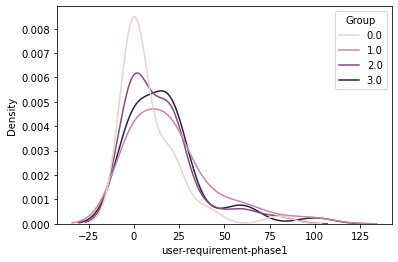

In [58]:
sns.kdeplot(data=overall_loc_scores, x='user-requirement-phase1', hue='Group')

## improve-ur-15 Line Charts

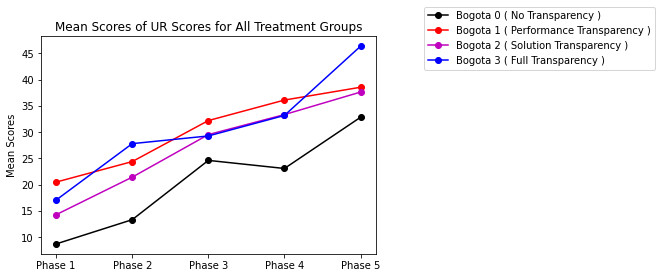

In [59]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ UR Scores ]

y1 = [phase1_ur[0], phase2_ur[0], phase3_ur[0], phase4_ur[0], phase5_ur[0] ]
y2 = [phase1_ur[1], phase2_ur[1], phase3_ur[1], phase4_ur[1], phase5_ur[1] ]
y3 = [phase1_ur[2], phase2_ur[2], phase3_ur[2], phase4_ur[2], phase5_ur[2] ]
y4 = [phase1_ur[3], phase2_ur[3], phase3_ur[3], phase4_ur[3], phase5_ur[3] ]

x_axis=['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5']

line1 = plt.plot(x_axis, y1,'ko-',label='Bogota 0 ( No Transparency )')
line2 = plt.plot(x_axis, y2,'ro-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'mo-',label='Bogota 2 ( Solution Transparency )')
line3 = plt.plot(x_axis, y4,'bo-',label='Bogota 3 ( Full Transparency )')

plt.title("Mean Scores of UR Scores for All Treatment Groups")
plt.ylabel("Mean Scores")

plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)

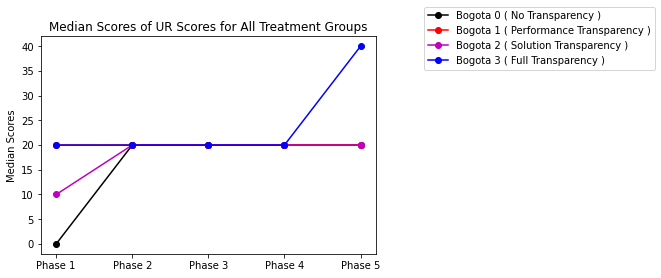

In [60]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ UR Scores ]

y1 = [phase1_ur_median[0], phase2_ur_median[0], phase3_ur_median[0], phase4_ur_median[0], phase5_ur_median[0] ]
y2 = [phase1_ur_median[1], phase2_ur_median[1], phase3_ur_median[1], phase4_ur_median[1], phase5_ur_median[1] ]
y3 = [phase1_ur_median[2], phase2_ur_median[2], phase3_ur_median[2], phase4_ur_median[2], phase5_ur_median[2] ]
y4 = [phase1_ur_median[3], phase2_ur_median[3], phase3_ur_median[3], phase4_ur_median[3], phase5_ur_median[3] ]

x_axis=['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5']

line1 = plt.plot(x_axis, y1,'ko-',label='Bogota 0 ( No Transparency )')
line2 = plt.plot(x_axis, y2,'ro-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'mo-',label='Bogota 2 ( Solution Transparency )')
line3 = plt.plot(x_axis, y4,'bo-',label='Bogota 3 ( Full Transparency )')

plt.title("Median Scores of UR Scores for All Treatment Groups")
plt.ylabel("Median Scores")

plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)

## T-test User Requirement Score

In [61]:
from itertools import combinations
from scipy import stats as st

df = overall_loc_scores[['Group','user-requirement-phase1', 'user-requirement-phase2', 'user-requirement-phase3', 'user-requirement-phase4', 'user-requirement-phase5']]

def all_pairwise(df, compare_col = 'Group'):
    decade_pairs = [(i,j) for i, j in combinations(df[compare_col].unique().tolist(), 2)]
    # or add a list of colnames to function signature
    cols = list(df.columns)
    cols.remove(compare_col)
    list_of_dfs = []
    for pair in decade_pairs:
        for col in cols:
            c1 = df[df[compare_col] == pair[0]][col]
            c2 = df[df[compare_col] == pair[1]][col]
            results = st.ttest_ind(c1, c2, nan_policy='omit')
            tmp = pd.DataFrame({'group1': pair[0],
                                'group2': pair[1],
                                'tstat': results.statistic,
                                'pvalue': results.pvalue}, index = [col])
            list_of_dfs.append(tmp)
    df_stats = pd.concat(list_of_dfs)
    return df_stats

df_stats = all_pairwise(df)
df_stats

,group1,group2,tstat,pvalue
user-requirement-phase1,0.0,1.0,-2.557224,0.012491
user-requirement-phase2,0.0,1.0,-2.231489,0.028520
user-requirement-phase3,0.0,1.0,-1.152179,0.252767
user-requirement-phase4,0.0,1.0,-1.974347,0.051882
user-requirement-phase5,0.0,1.0,-0.741276,0.460752
user-requirement-phase1,0.0,2.0,-1.411300,0.162082
user-requirement-phase2,0.0,2.0,-1.710534,0.091092
user-requirement-phase3,0.0,2.0,-0.753675,0.453285
user-requirement-phase4,0.0,2.0,-1.485416,0.141413
user-requirement-phase5,0.0,2.0,-0.609713,0.543802


## After Log-Transform User Requirement Score

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

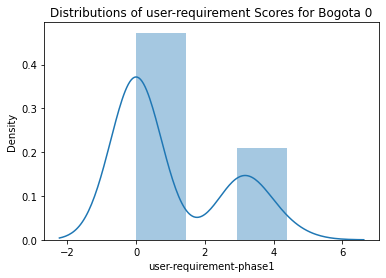

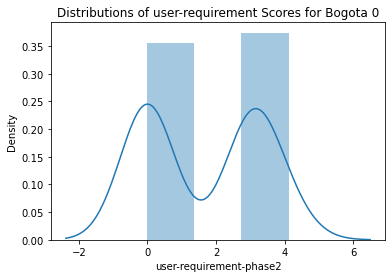

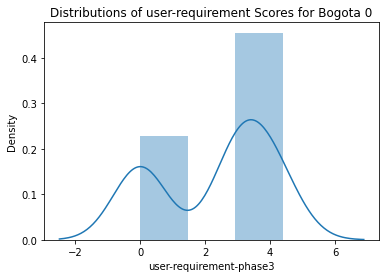

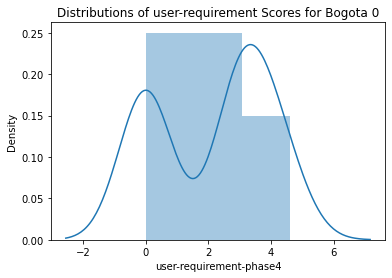

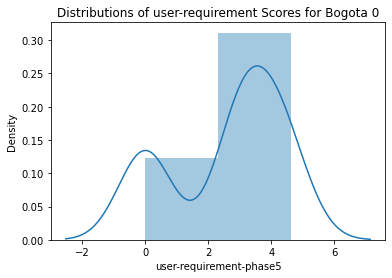

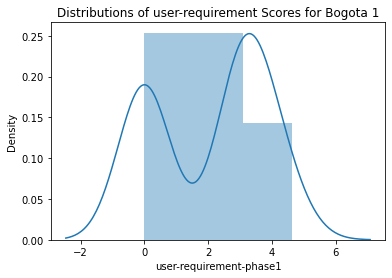

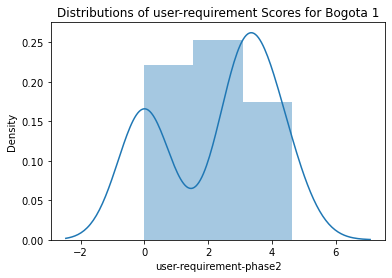

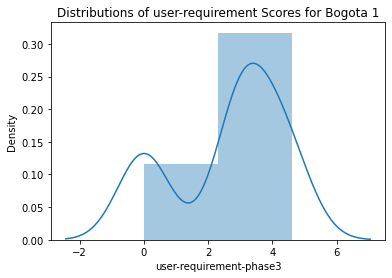

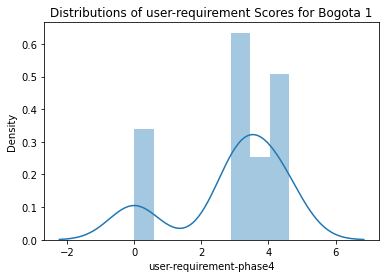

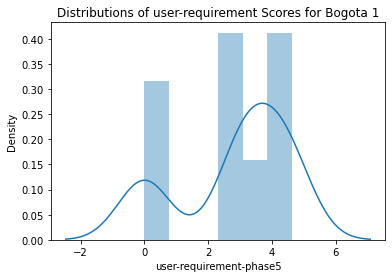

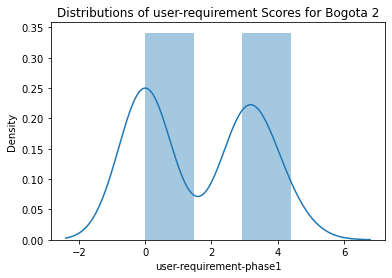

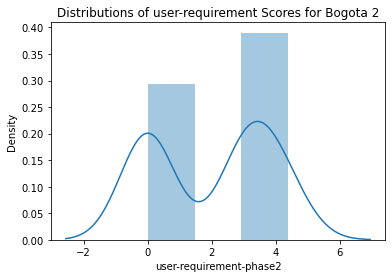

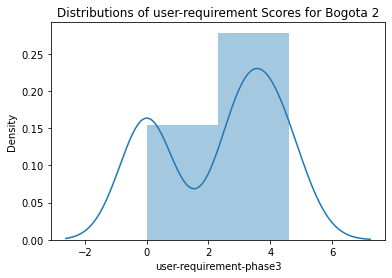

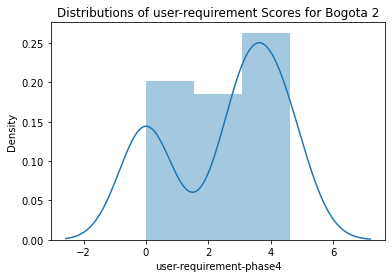

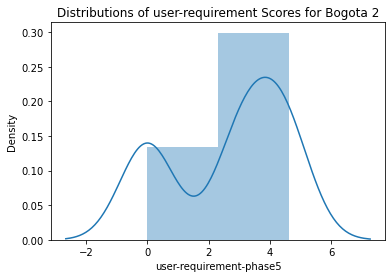

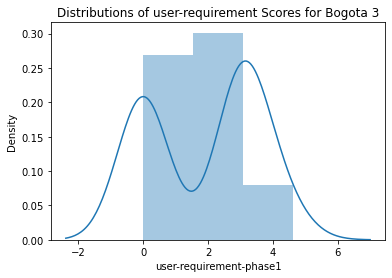

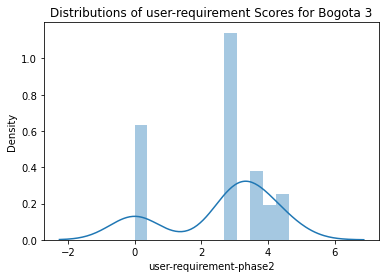

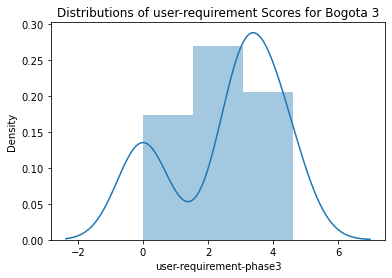

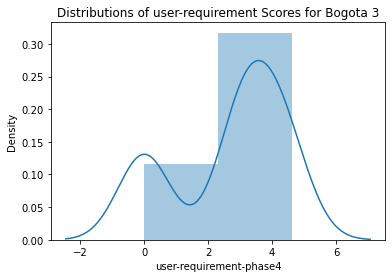

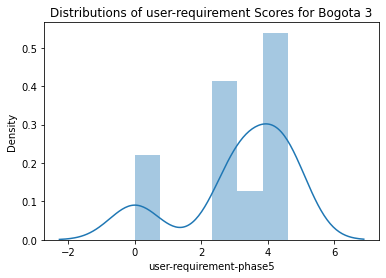

In [62]:
median_log_bogota3 = []
median_log_bogota2 = []
median_log_bogota1 = []
median_log_bogota0 = []

mean_log_bogota3 = []
mean_log_bogota2 = []
mean_log_bogota1 = []
mean_log_bogota0 = []

for df in [overall_loc_scores_group0['user-requirement-phase1'], overall_loc_scores_group0['user-requirement-phase2'], overall_loc_scores_group0['user-requirement-phase3'], overall_loc_scores_group0['user-requirement-phase4'], overall_loc_scores_group0['user-requirement-phase5']]:
    median_value0 = np.log(df+1).median()
    median_log_bogota0.append(median_value0)
    mean_value0 = np.log(df+1).mean()
    mean_log_bogota0.append(mean_value0)
    plt.figure()
    plt.title("Distributions of user-requirement Scores for Bogota 0")
    sns.distplot(np.log(df+1))

for df in [overall_loc_scores_group1['user-requirement-phase1'], overall_loc_scores_group1['user-requirement-phase2'], overall_loc_scores_group1['user-requirement-phase3'], overall_loc_scores_group1['user-requirement-phase4'], overall_loc_scores_group1['user-requirement-phase5']]:
    median_value1 = np.log(df+1).median()
    median_log_bogota1.append(median_value1)
    mean_value1 = np.log(df+1).mean()
    mean_log_bogota1.append(mean_value1)
    plt.figure()
    plt.title("Distributions of user-requirement Scores for Bogota 1")
    sns.distplot(np.log(df+1))
    
for df in [overall_loc_scores_group2['user-requirement-phase1'], overall_loc_scores_group2['user-requirement-phase2'], overall_loc_scores_group2['user-requirement-phase3'], overall_loc_scores_group2['user-requirement-phase4'], overall_loc_scores_group2['user-requirement-phase5']]:
    median_value2 = np.log(df+1).median()
    median_log_bogota2.append(median_value2)
    mean_value2 = np.log(df+1).mean()
    mean_log_bogota2.append(mean_value2)
    plt.figure()
    plt.title("Distributions of user-requirement Scores for Bogota 2")
    sns.distplot(np.log(df+1))

for df in [overall_loc_scores_group3['user-requirement-phase1'], overall_loc_scores_group3['user-requirement-phase2'], overall_loc_scores_group3['user-requirement-phase3'], overall_loc_scores_group3['user-requirement-phase4'], overall_loc_scores_group3['user-requirement-phase5']]:
    median_value3 = np.log(df+1).median()
    median_log_bogota3.append(median_value3)
    mean_value3 = np.log(df+1).mean()
    mean_log_bogota3.append(mean_value3)
    plt.figure()
    plt.title("Distributions of user-requirement Scores for Bogota 3")
    sns.distplot(np.log(df+1))

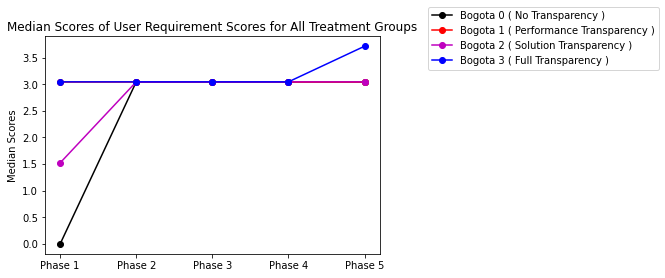

In [63]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Tech Scores ]

y1 = median_log_bogota0
y2 = median_log_bogota1
y3 = median_log_bogota2
y4 = median_log_bogota3


x_axis=['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5']

line1 = plt.plot(x_axis, y1,'ko-',label='Bogota 0 ( No Transparency )')
line2 = plt.plot(x_axis, y2,'ro-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'mo-',label='Bogota 2 ( Solution Transparency )')
line3 = plt.plot(x_axis, y4,'bo-',label='Bogota 3 ( Full Transparency )')

plt.title("Median Scores of User Requirement Scores for All Treatment Groups")
plt.ylabel("Median Scores")

plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)

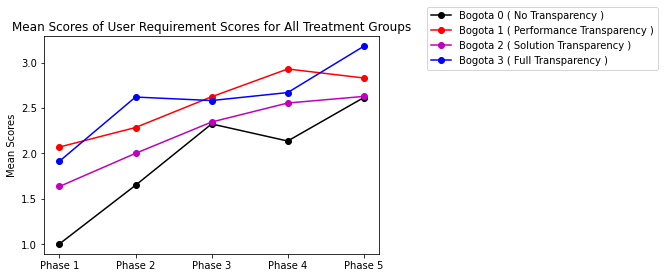

In [64]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Tech Scores ]

y1 = mean_log_bogota0
y2 = mean_log_bogota1
y3 = mean_log_bogota2
y4 = mean_log_bogota3


x_axis=['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5']

line1 = plt.plot(x_axis, y1,'ko-',label='Bogota 0 ( No Transparency )')
line2 = plt.plot(x_axis, y2,'ro-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'mo-',label='Bogota 2 ( Solution Transparency )')
line3 = plt.plot(x_axis, y4,'bo-',label='Bogota 3 ( Full Transparency )')

plt.title("Mean Scores of User Requirement Scores for All Treatment Groups")
plt.ylabel("Mean Scores")

plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)

## Before Log-Transform Novelty Score

## improve-novel-15 Box Plots

/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 7.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


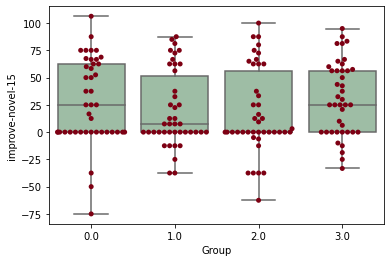

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='Group', y='improve-novel-15', data=overall_loc_scores_final, color='#99c2a2')
ax = sns.swarmplot(x="Group", y="improve-novel-15", data=overall_loc_scores_final, color='#7d0013')
plt.show()

In [66]:
overall_loc_scores_final.groupby('Group', as_index=False)['novelty-phase1'].mean()

,Group,novelty-phase1
0,0.0,8.139535
1,1.0,27.956429
2,2.0,24.702381
3,3.0,19.867805


In [67]:
overall_loc_scores_final.groupby('Group', as_index=False)['novelty-phase2'].mean()

,Group,novelty-phase2
0,0.0,20.058140
1,1.0,35.565476
2,2.0,32.142857
3,3.0,23.018293


In [68]:
overall_loc_scores_final.groupby('Group', as_index=False)['novelty-phase3'].mean()

,Group,novelty-phase3
0,0.0,24.563953
1,1.0,42.113095
2,2.0,30.257857
3,3.0,25.304878


In [69]:
overall_loc_scores_final.groupby('Group', as_index=False)['novelty-phase4'].mean()

,Group,novelty-phase4
0,0.0,26.744186
1,1.0,39.727143
2,2.0,29.042619
3,3.0,30.589512


In [70]:
overall_loc_scores_final.groupby('Group', as_index=False)['novelty-phase5'].mean()

,Group,novelty-phase5
0,0.0,35.484651
1,1.0,47.817619
2,2.0,42.797857
3,3.0,50.690976


In [71]:
phase5_novelty = []
phase4_novelty  = []
phase3_novelty  = []
phase2_novelty  = []
phase1_novelty  = []

phase5_novelty_median = []
phase4_novelty_median = []
phase3_novelty_median = []
phase2_novelty_median = []
phase1_novelty_median = []

for i in range(4):
    phase5_novelty.append(overall_loc_scores[overall_loc_scores['Group'] == i]['novelty-phase5'].mean())
    phase5_novelty_median.append(overall_loc_scores[overall_loc_scores['Group'] == i]['novelty-phase5'].median())

for i in range(4):
    phase4_novelty.append(overall_loc_scores[overall_loc_scores['Group'] == i]['novelty-phase4'].mean())
    phase4_novelty_median.append(overall_loc_scores[overall_loc_scores['Group'] == i]['novelty-phase4'].median())

for i in range(4):
    phase3_novelty.append(overall_loc_scores[overall_loc_scores['Group'] == i]['novelty-phase3'].mean())
    phase3_novelty_median.append(overall_loc_scores[overall_loc_scores['Group'] == i]['novelty-phase3'].median())

for i in range(4):
    phase2_novelty.append(overall_loc_scores[overall_loc_scores['Group'] == i]['novelty-phase2'].mean())
    phase2_novelty_median.append(overall_loc_scores[overall_loc_scores['Group'] == i]['novelty-phase2'].median())
    
for i in range(4):
    phase1_novelty.append(overall_loc_scores[overall_loc_scores['Group'] == i]['novelty-phase1'].mean())
    phase1_novelty_median.append(overall_loc_scores[overall_loc_scores['Group'] == i]['novelty-phase1'].median())

<AxesSubplot:xlabel='novelty-phase5', ylabel='Density'>

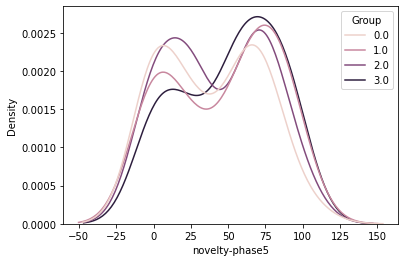

In [72]:
sns.kdeplot(data=overall_loc_scores, x='novelty-phase5', hue='Group')

<AxesSubplot:xlabel='novelty-phase4', ylabel='Density'>

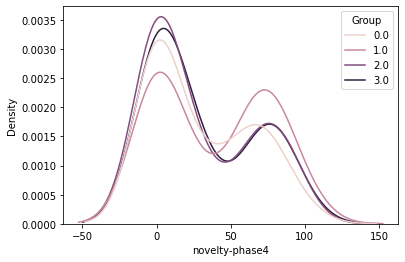

In [73]:
sns.kdeplot(data=overall_loc_scores, x='novelty-phase4', hue='Group')

<AxesSubplot:xlabel='novelty-phase3', ylabel='Density'>

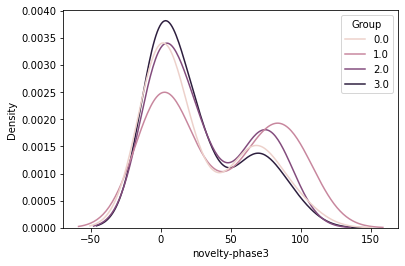

In [74]:
sns.kdeplot(data=overall_loc_scores, x='novelty-phase3', hue='Group')

<AxesSubplot:xlabel='novelty-phase2', ylabel='Density'>

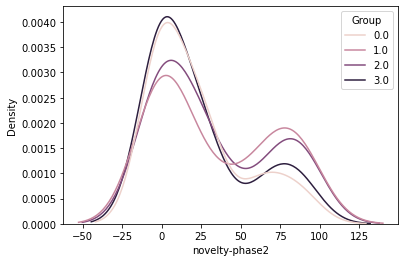

In [75]:
sns.kdeplot(data=overall_loc_scores, x='novelty-phase2', hue='Group')

<AxesSubplot:xlabel='novelty-phase1', ylabel='Density'>

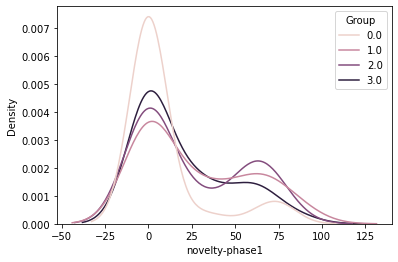

In [76]:
sns.kdeplot(data=overall_loc_scores, x='novelty-phase1', hue='Group')

## improve-novel-15 Line Charts

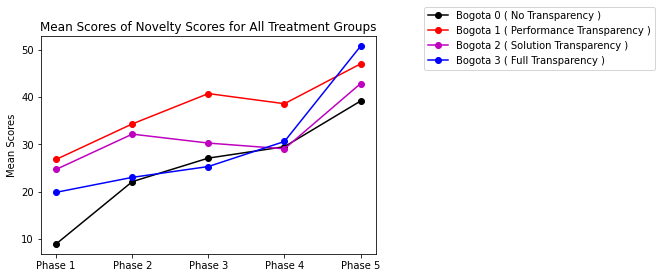

In [77]:
import matplotlib.pyplot as plt


y1 = [phase1_novelty[0], phase2_novelty[0], phase3_novelty[0], phase4_novelty[0], phase5_novelty[0] ]
y2 = [phase1_novelty[1], phase2_novelty[1], phase3_novelty[1], phase4_novelty[1], phase5_novelty[1] ]
y3 = [phase1_novelty[2], phase2_novelty[2], phase3_novelty[2], phase4_novelty[2], phase5_novelty[2] ]
y4 = [phase1_novelty[3], phase2_novelty[3], phase3_novelty[3], phase4_novelty[3], phase5_novelty[3] ]

x_axis=['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5']

line1 = plt.plot(x_axis, y1,'ko-',label='Bogota 0 ( No Transparency )')
line2 = plt.plot(x_axis, y2,'ro-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'mo-',label='Bogota 2 ( Solution Transparency )')
line3 = plt.plot(x_axis, y4,'bo-',label='Bogota 3 ( Full Transparency )')

plt.title("Mean Scores of Novelty Scores for All Treatment Groups")
plt.ylabel("Mean Scores")

plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)

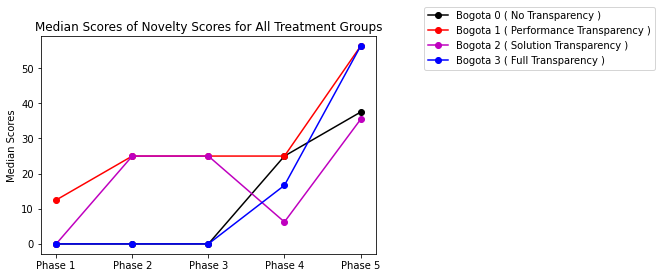

In [78]:
import matplotlib.pyplot as plt


y1 = [phase1_novelty_median[0], phase2_novelty_median[0], phase3_novelty_median[0], phase4_novelty_median[0], phase5_novelty_median[0] ]
y2 = [phase1_novelty_median[1], phase2_novelty_median[1], phase3_novelty_median[1], phase4_novelty_median[1], phase5_novelty_median[1] ]
y3 = [phase1_novelty_median[2], phase2_novelty_median[2], phase3_novelty_median[2], phase4_novelty_median[2], phase5_novelty_median[2] ]
y4 = [phase1_novelty_median[3], phase2_novelty_median[3], phase3_novelty_median[3], phase4_novelty_median[3], phase5_novelty_median[3] ]

x_axis=['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5']

line1 = plt.plot(x_axis, y1,'ko-',label='Bogota 0 ( No Transparency )')
line2 = plt.plot(x_axis, y2,'ro-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'mo-',label='Bogota 2 ( Solution Transparency )')
line3 = plt.plot(x_axis, y4,'bo-',label='Bogota 3 ( Full Transparency )')

plt.title("Median Scores of Novelty Scores for All Treatment Groups")
plt.ylabel("Median Scores")

plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)

## T-test for Novelty 

In [79]:
from itertools import combinations
from scipy import stats as st

df = overall_loc_scores[['Group','novelty-phase1', 'novelty-phase2', 'novelty-phase3', 'novelty-phase4', 'novelty-phase5']]

def all_pairwise(df, compare_col = 'Group'):
    decade_pairs = [(i,j) for i, j in combinations(df[compare_col].unique().tolist(), 2)]
    # or add a list of colnames to function signature
    cols = list(df.columns)
    cols.remove(compare_col)
    list_of_dfs = []
    for pair in decade_pairs:
        for col in cols:
            c1 = df[df[compare_col] == pair[0]][col]
            c2 = df[df[compare_col] == pair[1]][col]
            results = st.ttest_ind(c1, c2, nan_policy='omit')
            tmp = pd.DataFrame({'group1': pair[0],
                                'group2': pair[1],
                                'tstat': results.statistic,
                                'pvalue': results.pvalue}, index = [col])
            list_of_dfs.append(tmp)
    df_stats = pd.concat(list_of_dfs)
    return df_stats

df_stats = all_pairwise(df)
df_stats

,group1,group2,tstat,pvalue
novelty-phase1,0.0,1.0,-2.932636,0.004410
novelty-phase2,0.0,1.0,-1.637288,0.105599
novelty-phase3,0.0,1.0,-1.591831,0.115467
novelty-phase4,0.0,1.0,-1.152303,0.252716
novelty-phase5,0.0,1.0,-1.028663,0.306817
novelty-phase1,0.0,2.0,-2.649205,0.009741
novelty-phase2,0.0,2.0,-1.388548,0.168873
novelty-phase3,0.0,2.0,-0.415495,0.678906
novelty-phase4,0.0,2.0,0.058477,0.953516
novelty-phase5,0.0,2.0,-0.499937,0.618509


## After Log-Transform Novelty Scores

In [ ]:
median_log_bogota3 = []
median_log_bogota2 = []
median_log_bogota1 = []
median_log_bogota0 = []

mean_log_bogota3 = []
mean_log_bogota2 = []
mean_log_bogota1 = []
mean_log_bogota0 = []

for df in [overall_loc_scores_group0['novelty-phase1'], overall_loc_scores_group0['novelty-phase2'], overall_loc_scores_group0['novelty-phase3'], overall_loc_scores_group0['novelty-phase4'], overall_loc_scores_group0['novelty-phase5']]:
    median_value0 = np.log(df+1).median()
    median_log_bogota0.append(median_value0)
    mean_value0 = np.log(df+1).mean()
    mean_log_bogota0.append(mean_value0)
    plt.figure()
    plt.title("Distributions of user-requirement Scores for Bogota 0")
    sns.distplot(np.log(df+1))

for df in [overall_loc_scores_group1['novelty-phase1'], overall_loc_scores_group1['novelty-phase2'], overall_loc_scores_group1['novelty-phase3'], overall_loc_scores_group1['novelty-phase4'], overall_loc_scores_group1['novelty-phase5']]:
    median_value1 = np.log(df+1).median()
    median_log_bogota1.append(median_value1)
    mean_value1 = np.log(df+1).mean()
    mean_log_bogota1.append(mean_value1)
    plt.figure()
    plt.title("Distributions of user-requirement Scores for Bogota 1")
    sns.distplot(np.log(df+1))
    
for df in [overall_loc_scores_group2['novelty-phase1'], overall_loc_scores_group2['novelty-phase2'], overall_loc_scores_group2['novelty-phase3'], overall_loc_scores_group2['novelty-phase4'], overall_loc_scores_group2['novelty-phase5']]:
    median_value2 = np.log(df+1).median()
    median_log_bogota2.append(median_value2)
    mean_value2 = np.log(df+1).mean()
    mean_log_bogota2.append(mean_value2)
    plt.figure()
    plt.title("Distributions of user-requirement Scores for Bogota 2")
    sns.distplot(np.log(df+1))

for df in [overall_loc_scores_group3['novelty-phase1'], overall_loc_scores_group3['novelty-phase2'], overall_loc_scores_group3['novelty-phase3'], overall_loc_scores_group3['novelty-phase4'], overall_loc_scores_group3['novelty-phase5']]:
    median_value3 = np.log(df+1).median()
    median_log_bogota3.append(median_value3)
    mean_value3 = np.log(df+1).mean()
    mean_log_bogota3.append(mean_value3)
    plt.figure()
    plt.title("Distributions of user-requirement Scores for Bogota 3")
    sns.distplot(np.log(df+1))

In [ ]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Tech Scores ]

y1 = median_log_bogota0
y2 = median_log_bogota1
y3 = median_log_bogota2
y4 = median_log_bogota3


x_axis=['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5']

line1 = plt.plot(x_axis, y1,'ko-',label='Bogota 0 ( No Transparency )')
line2 = plt.plot(x_axis, y2,'ro-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'mo-',label='Bogota 2 ( Solution Transparency )')
line3 = plt.plot(x_axis, y4,'bo-',label='Bogota 3 ( Full Transparency )')

plt.title("Median Scores of Novelty Scores for All Treatment Groups")
plt.ylabel("Median Scores")

plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)

In [ ]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Tech Scores ]

y1 = mean_log_bogota0
y2 = mean_log_bogota1
y3 = mean_log_bogota2
y4 = mean_log_bogota3


x_axis=['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5']

line1 = plt.plot(x_axis, y1,'ko-',label='Bogota 0 ( No Transparency )')
line2 = plt.plot(x_axis, y2,'ro-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'mo-',label='Bogota 2 ( Solution Transparency )')
line3 = plt.plot(x_axis, y4,'bo-',label='Bogota 3 ( Full Transparency )')

plt.title("Mean Scores of Novelty Scores for All Treatment Groups")
plt.ylabel("Mean Scores")

plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)

## T-tests for Scores

In [ ]:
from itertools import combinations
from scipy import stats as st

df = overall_loc_scores[['Group','improve-tech-12','improve-tech-23', 'improve-tech-34' , 'improve-tech-45']]

def all_pairwise(df, compare_col = 'Group'):
    decade_pairs = [(i,j) for i, j in combinations(df[compare_col].unique().tolist(), 2)]
    # or add a list of colnames to function signature
    cols = list(df.columns)
    cols.remove(compare_col)
    list_of_dfs = []
    for pair in decade_pairs:
        for col in cols:
            c1 = df[df[compare_col] == pair[0]][col]
            c2 = df[df[compare_col] == pair[1]][col]
            results = st.ttest_ind(c1, c2, nan_policy='omit')
            tmp = pd.DataFrame({'group1': pair[0],
                                'group2': pair[1],
                                'tstat': results.statistic,
                                'pvalue': results.pvalue}, index = [col])
            list_of_dfs.append(tmp)
    df_stats = pd.concat(list_of_dfs)
    return df_stats

df_stats = all_pairwise(df)
df_stats

In [ ]:
from itertools import combinations
from scipy import stats as st

df = overall_loc_scores[['Group','tech-phase1','tech-phase2', 'tech-phase3' , 'tech-phase4', 'tech-phase5']]

def all_pairwise(df, compare_col = 'Group'):
    decade_pairs = [(i,j) for i, j in combinations(df[compare_col].unique().tolist(), 2)]
    # or add a list of colnames to function signature
    cols = list(df.columns)
    cols.remove(compare_col)
    list_of_dfs = []
    for pair in decade_pairs:
        for col in cols:
            c1 = df[df[compare_col] == pair[0]][col]
            c2 = df[df[compare_col] == pair[1]][col]
            results = st.ttest_ind(c1, c2, nan_policy='omit')
            tmp = pd.DataFrame({'group1': pair[0],
                                'group2': pair[1],
                                'tstat': results.statistic,
                                'pvalue': results.pvalue}, index = [col])
            list_of_dfs.append(tmp)
    df_stats = pd.concat(list_of_dfs)
    return df_stats

df_stats = all_pairwise(df)
df_stats

In [ ]:
from itertools import combinations
from scipy import stats as st

df = overall_loc_scores[['Group','user-requirement-phase1','user-requirement-phase2', 'user-requirement-phase3' , 'user-requirement-phase4', 'user-requirement-phase5']]

def all_pairwise(df, compare_col = 'Group'):
    decade_pairs = [(i,j) for i, j in combinations(df[compare_col].unique().tolist(), 2)]
    # or add a list of colnames to function signature
    cols = list(df.columns)
    cols.remove(compare_col)
    list_of_dfs = []
    for pair in decade_pairs:
        for col in cols:
            c1 = df[df[compare_col] == pair[0]][col]
            c2 = df[df[compare_col] == pair[1]][col]
            results = st.ttest_ind(c1, c2, nan_policy='omit')
            tmp = pd.DataFrame({'group1': pair[0],
                                'group2': pair[1],
                                'tstat': results.statistic,
                                'pvalue': results.pvalue}, index = [col])
            list_of_dfs.append(tmp)
    df_stats = pd.concat(list_of_dfs)
    return df_stats

df_stats = all_pairwise(df)
df_stats

In [ ]:
from itertools import combinations
from scipy import stats as st

df = overall_loc_scores[['Group','infovis-phase1','infovis-phase2', 'infovis-phase3' , 'infovis-phase4', 'infovis-phase5']]

def all_pairwise(df, compare_col = 'Group'):
    decade_pairs = [(i,j) for i, j in combinations(df[compare_col].unique().tolist(), 2)]
    # or add a list of colnames to function signature
    cols = list(df.columns)
    cols.remove(compare_col)
    list_of_dfs = []
    for pair in decade_pairs:
        for col in cols:
            c1 = df[df[compare_col] == pair[0]][col]
            c2 = df[df[compare_col] == pair[1]][col]
            results = st.ttest_ind(c1, c2, nan_policy='omit')
            tmp = pd.DataFrame({'group1': pair[0],
                                'group2': pair[1],
                                'tstat': results.statistic,
                                'pvalue': results.pvalue}, index = [col])
            list_of_dfs.append(tmp)
    df_stats = pd.concat(list_of_dfs)
    return df_stats

df_stats = all_pairwise(df)
df_stats

In [ ]:
from itertools import combinations
from scipy import stats as st

df = overall_loc_scores[['Group','improve-novel-12','improve-novel-23', 'improve-novel-34' , 'improve-novel-45']]

def all_pairwise(df, compare_col = 'Group'):
    decade_pairs = [(i,j) for i, j in combinations(df[compare_col].unique().tolist(), 2)]
    # or add a list of colnames to function signature
    cols = list(df.columns)
    cols.remove(compare_col)
    list_of_dfs = []
    for pair in decade_pairs:
        for col in cols:
            c1 = df[df[compare_col] == pair[0]][col]
            c2 = df[df[compare_col] == pair[1]][col]
            results = st.ttest_ind(c1, c2, nan_policy='omit')
            tmp = pd.DataFrame({'group1': pair[0],
                                'group2': pair[1],
                                'tstat': results.statistic,
                                'pvalue': results.pvalue}, index = [col])
            list_of_dfs.append(tmp)
    df_stats = pd.concat(list_of_dfs)
    return df_stats

df_stats = all_pairwise(df)
df_stats

In [ ]:
from itertools import combinations
from scipy import stats as st

df = overall_loc_scores[['Group','novelty-phase1','novelty-phase2', 'novelty-phase3' , 'novelty-phase4', 'novelty-phase5']]

def all_pairwise(df, compare_col = 'Group'):
    decade_pairs = [(i,j) for i, j in combinations(df[compare_col].unique().tolist(), 2)]
    # or add a list of colnames to function signature
    cols = list(df.columns)
    cols.remove(compare_col)
    list_of_dfs = []
    for pair in decade_pairs:
        for col in cols:
            c1 = df[df[compare_col] == pair[0]][col]
            c2 = df[df[compare_col] == pair[1]][col]
            results = st.ttest_ind(c1, c2, nan_policy='omit')
            tmp = pd.DataFrame({'group1': pair[0],
                                'group2': pair[1],
                                'tstat': results.statistic,
                                'pvalue': results.pvalue}, index = [col])
            list_of_dfs.append(tmp)
    df_stats = pd.concat(list_of_dfs)
    return df_stats

df_stats = all_pairwise(df)
df_stats

## add-loc-15 Box Plots

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='Group', y='add-loc-15', data=overall_loc_scores_final, color='#99c2a2')
ax = sns.swarmplot(x="Group", y="add-loc-15", data=overall_loc_scores_final, color='#7d0013')
plt.show()

In [ ]:
overall_loc_scores_final.groupby('Group', as_index=False)['add-loc-15'].mean()

In [ ]:
overall_loc_scores_final.groupby('Group', as_index=False)['add-loc-12'].mean()

In [ ]:
overall_loc_scores_final.groupby('Group', as_index=False)['add-loc-23'].mean()

In [ ]:
overall_loc_scores_final.groupby('Group', as_index=False)['add-loc-34'].mean()

In [ ]:
overall_loc_scores_final.groupby('Group', as_index=False)['add-loc-45'].mean()

##  Log-Transform Lines Added

In [ ]:
median_log_bogota3 = []
median_log_bogota2 = []
median_log_bogota1 = []
median_log_bogota0 = []

mean_log_bogota3 = []
mean_log_bogota2 = []
mean_log_bogota1 = []
mean_log_bogota0 = []

max_log_bogota3 = []
max_log_bogota2 = []
max_log_bogota1 = []
max_log_bogota0 = []

for df in [overall_loc_scores_group0['add-loc-12'], overall_loc_scores_group0['add-loc-23'], overall_loc_scores_group0['add-loc-34'], overall_loc_scores_group0['add-loc-45']]:
    median_value0 = np.log(df+1).median()
    median_log_bogota0.append(median_value0)
    mean_value0 = np.log(df+1).mean()
    mean_log_bogota0.append(mean_value0)
    max_value0 = np.log(df+1).max()
    max_log_bogota0.append(max_value0)
    plt.figure()
    plt.title("Distributions of Lines Added for Bogota 0")
    sns.distplot(np.log(df+1))

for df in [overall_loc_scores_group1['add-loc-12'], overall_loc_scores_group1['add-loc-23'], overall_loc_scores_group1['add-loc-34'], overall_loc_scores_group1['add-loc-45']]:
    median_value1 = np.log(df+1).median()
    median_log_bogota1.append(median_value1)
    mean_value1 = np.log(df+1).mean()
    mean_log_bogota1.append(mean_value1)
    max_value1 = np.log(df+1).max()
    max_log_bogota1.append(max_value1)
    plt.figure()
    plt.title("Distributions of Lines Added for Bogota 1")
    sns.distplot(np.log(df+1))
    
for df in [overall_loc_scores_group2['add-loc-12'], overall_loc_scores_group2['add-loc-23'], overall_loc_scores_group2['add-loc-34'], overall_loc_scores_group2['add-loc-45']]:
    median_value2 = np.log(df+1).median()
    median_log_bogota2.append(median_value2)
    mean_value2 = np.log(df+1).mean()
    mean_log_bogota2.append(mean_value2)
    max_value2 = np.log(df+1).max()
    max_log_bogota2.append(max_value2)
    plt.figure()
    plt.title("Distributions of Lines Added for Bogota 2")
    sns.distplot(np.log(df+1))

for df in [overall_loc_scores_group3['add-loc-12'], overall_loc_scores_group3['add-loc-23'], overall_loc_scores_group3['add-loc-34'], overall_loc_scores_group3['add-loc-45']]:
    median_value3 = np.log(df+1).median()
    median_log_bogota3.append(median_value3)
    mean_value3 = np.log(df+1).mean()
    mean_log_bogota3.append(mean_value3)
    max_value3 = np.log(df+1).max()
    max_log_bogota3.append(max_value3)
    plt.figure()
    plt.title("Distributions of Lines Added for Bogota 3")
    sns.distplot(np.log(df+1))

                    

> Interpretation: The plots for the lines of code is positively skewed. The lines of codes here are the differences between phases. 

In [ ]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Novelty Scores ]

y1 = mean_log_bogota0
y2 = mean_log_bogota1
y3 = mean_log_bogota2
y4 = mean_log_bogota3

x_axis=['Phase 1-2', 'Phase 2-3', 'Phase 3-4', 'Phase 4-5']

line1 = plt.plot(x_axis, y1,'ko-',label='Bogota 0 ( No Transparency )')
line2 = plt.plot(x_axis, y2,'ro-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'mo-',label='Bogota 2 ( Solution Transparency )')
line3 = plt.plot(x_axis, y4,'bo-',label='Bogota 3 ( Full Transparency )')

plt.title("Log Transformed Mean of Line Added for All Treatment Groups")
plt.ylabel("Log Transform Mean Scores")

plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)

In [ ]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Novelty Scores ]

y1 = median_log_bogota0
y2 = median_log_bogota1
y3 = median_log_bogota2
y4 = median_log_bogota3

x_axis=['Phase 1-2', 'Phase 2-3', 'Phase 3-4', 'Phase 4-5']

line1 = plt.plot(x_axis, y1,'ko-',label='Bogota 0 ( No Transparency )')
line2 = plt.plot(x_axis, y2,'ro-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'mo-',label='Bogota 2 ( Solution Transparency )')
line3 = plt.plot(x_axis, y4,'bo-',label='Bogota 3 ( Full Transparency )')

plt.title("Log Transformed Median of Line Added for All Treatment Groups")
plt.ylabel("Log Transform Median Scores")

plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)

In [ ]:
import matplotlib.pyplot as plt


y1 = max_log_bogota0
y2 = max_log_bogota1
y3 = max_log_bogota2
y4 = max_log_bogota3

x_axis=['Phase 1-2', 'Phase 2-3', 'Phase 3-4', 'Phase 4-5']

line1 = plt.plot(x_axis, y1,'ko-',label='Bogota 0 ( No Transparency )')
line2 = plt.plot(x_axis, y2,'ro-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'mo-',label='Bogota 2 ( Solution Transparency )')
line3 = plt.plot(x_axis, y4,'bo-',label='Bogota 3 ( Full Transparency )')

plt.title("Log Transformed Max of Line Added for All Treatment Groups")
plt.ylabel("Log Transform Max Lines Added")

plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)

## T-test for Lines of Codes Added

In [ ]:
# T-tests between Bogota 2 and Bogota 1

from scipy import stats

import pandas as pd
import inspect

def retrieve_name(var):
   callers_local_vars = inspect.currentframe().f_back.f_globals.items()
   return [var_name for var_name, var_val in callers_local_vars if var_val is var][0]

list1,list2 = [overall_loc_scores_group0['add-loc-12'], overall_loc_scores_group0['add-loc-23'], overall_loc_scores_group0['add-loc-34'], overall_loc_scores_group0['add-loc-45']], [overall_loc_scores_group3['add-loc-12'], overall_loc_scores_group3['add-loc-23'], overall_loc_scores_group3['add-loc-34'], overall_loc_scores_group3['add-loc-45']]
for x in range(len(list1)):
    for y in range(len(list2)):
        print('---------')
        print(stats.ttest_ind(list1[x], list2[y]))
        

In [ ]:
# T-tests between Bogota 2 and Bogota 1

from scipy import stats

import pandas as pd
import inspect

def retrieve_name(var):
   callers_local_vars = inspect.currentframe().f_back.f_globals.items()
   return [var_name for var_name, var_val in callers_local_vars if var_val is var][0]

list1,list2 = [overall_loc_scores_group2['add-loc-12'], overall_loc_scores_group2['add-loc-23'], overall_loc_scores_group2['add-loc-34'], overall_loc_scores_group2['add-loc-45']], [overall_loc_scores_group3['add-loc-12'], overall_loc_scores_group3['add-loc-23'], overall_loc_scores_group3['add-loc-34'], overall_loc_scores_group3['add-loc-45']]
for x in range(len(list1)):
    for y in range(len(list2)):
        print('---------')
        print(stats.ttest_ind(list1[x], list2[y]))
        

In [ ]:
# T-tests between Bogota 2 and Bogota 1

from scipy import stats

import pandas as pd
import inspect

def retrieve_name(var):
   callers_local_vars = inspect.currentframe().f_back.f_globals.items()
   return [var_name for var_name, var_val in callers_local_vars if var_val is var][0]

list1,list2 = [overall_loc_scores_group1['add-loc-12'], overall_loc_scores_group1['add-loc-23'], overall_loc_scores_group1['add-loc-34'], overall_loc_scores_group1['add-loc-45']], [overall_loc_scores_group3['add-loc-12'], overall_loc_scores_group3['add-loc-23'], overall_loc_scores_group3['add-loc-34'], overall_loc_scores_group3['add-loc-45']]
for x in range(len(list1)):
    for y in range(len(list2)):
        print('---------')
        print(stats.ttest_ind(list1[x], list2[y]))
        

## Log-Transformed Lines of Codes Deleted ( Diff Between Phases )

In [ ]:
median_log_bogota3 = []
median_log_bogota2 = []
median_log_bogota1 = []
median_log_bogota0 = []

mean_log_bogota3 = []
mean_log_bogota2 = []
mean_log_bogota1 = []
mean_log_bogota0 = []

for df in [overall_loc_scores_group0['delete-loc-12'], overall_loc_scores_group0['delete-loc-23'], overall_loc_scores_group0['delete-loc-34'], overall_loc_scores_group0['delete-loc-45']]:
    median_value0 = np.log(df+1).median()
    median_log_bogota0.append(median_value0)
    mean_value0 = np.log(df+1).mean()
    mean_log_bogota0.append(mean_value0)
    plt.figure()
    plt.title("Distributions of Lines Deleted for Bogota 0")
    sns.distplot(np.log(df+1))

for df in [overall_loc_scores_group1['delete-loc-12'], overall_loc_scores_group1['delete-loc-23'], overall_loc_scores_group1['delete-loc-34'], overall_loc_scores_group1['delete-loc-45']]:
    median_value1 = np.log(df+1).median()
    median_log_bogota1.append(median_value1)
    mean_value1 = np.log(df+1).mean()
    mean_log_bogota1.append(mean_value1)
    plt.figure()
    plt.title("Distributions of Lines Deleted for Bogota 1")
    sns.distplot(np.log(df+1))
    
for df in [overall_loc_scores_group2['delete-loc-12'], overall_loc_scores_group2['delete-loc-23'], overall_loc_scores_group2['delete-loc-34'], overall_loc_scores_group2['delete-loc-45']]:
    median_value2 = np.log(df+1).median()
    median_log_bogota2.append(median_value2)
    mean_value2 = np.log(df+1).mean()
    mean_log_bogota2.append(mean_value2)
    plt.figure()
    plt.title("Distributions of Lines Deleted for Bogota 2")
    sns.distplot(np.log(df+1))

for df in [overall_loc_scores_group3['delete-loc-12'], overall_loc_scores_group3['delete-loc-23'], overall_loc_scores_group3['delete-loc-34'], overall_loc_scores_group3['delete-loc-45']]:
    median_value3 = np.log(df+1).median()
    median_log_bogota3.append(median_value3)
    mean_value3 = np.log(df+1).mean()
    mean_log_bogota3.append(mean_value3)
    plt.figure()
    plt.title("Distributions of Lines Deleted for Bogota 3")
    sns.distplot(np.log(df+1))

                    

## delete-loc Box Plot

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='Group', y='delete-loc-15', data=overall_loc_scores_final, color='#99c2a2')
ax = sns.stripplot(x="Group", y="delete-loc-15", data=overall_loc_scores_final, color='#7d0013')
plt.show()

In [ ]:
overall_loc_scores_final.groupby('Group', as_index=False)['delete-loc-15'].mean()

In [ ]:
overall_loc_scores_final.groupby('Group', as_index=False)['delete-loc-12'].mean()

In [ ]:
overall_loc_scores_final.groupby('Group', as_index=False)['delete-loc-23'].mean()

In [ ]:
overall_loc_scores_final.groupby('Group', as_index=False)['delete-loc-34'].mean()

In [ ]:
overall_loc_scores_final.groupby('Group', as_index=False)['delete-loc-45'].mean()

In [ ]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Novelty Scores ]

y1 = median_log_bogota0
y2 = median_log_bogota1
y3 = median_log_bogota2
y4 = median_log_bogota3

x_axis=['Phase 1-2', 'Phase 2-3', 'Phase 3-4', 'Phase 4-5']

line1 = plt.plot(x_axis, y1,'ko-',label='Bogota 0 ( No Transparency )')
line2 = plt.plot(x_axis, y2,'ro-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'mo-',label='Bogota 2 ( Solution Transparency )')
line3 = plt.plot(x_axis, y4,'bo-',label='Bogota 3 ( Full Transparency )')

plt.title("Log Transformed Median of Line Deleted for All Treatment Groups")
plt.ylabel("Log Transform Median Lines Deleted")

plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)

In [ ]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Novelty Scores ]

y1 = mean_log_bogota0
y2 = mean_log_bogota1
y3 = mean_log_bogota2
y4 = mean_log_bogota3

x_axis=['Phase 1-2', 'Phase 2-3', 'Phase 3-4', 'Phase 4-5']

line1 = plt.plot(x_axis, y1,'ko-',label='Bogota 0 ( No Transparency )')
line2 = plt.plot(x_axis, y2,'ro-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'mo-',label='Bogota 2 ( Solution Transparency )')
line3 = plt.plot(x_axis, y4,'bo-',label='Bogota 3 ( Full Transparency )')

plt.title("Log Transformed Mean of Line Deleted for All Treatment Groups")
plt.ylabel("Log Transform Mean Lines Deleted")

plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)

## improve-effort-15 Box Plots

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='Group', y='improve-effort-15', data=overall_loc_scores_final, color='#99c2a2')
ax = sns.stripplot(x="Group", y='improve-effort-15', data=overall_loc_scores_final, color='#7d0013')
plt.show()

In [ ]:
overall_loc_scores_final.groupby('Group', as_index=False)['improve-effort-15'].mean()

In [ ]:
overall_loc_scores_final.groupby('Group', as_index=False)['improve-effort-12'].mean()

In [ ]:
overall_loc_scores_final.groupby('Group', as_index=False)['improve-effort-23'].mean()

In [ ]:
overall_loc_scores_final.groupby('Group', as_index=False)['improve-effort-34'].mean()

In [ ]:
overall_loc_scores_final.groupby('Group', as_index=False)['improve-effort-45'].mean()

In [ ]:
sns.kdeplot(data=overall_loc_scores_final, x='improve-effort-45', hue='Group')

In [ ]:
sns.kdeplot(data=overall_loc_scores, x='improve-effort-34', hue='Group')

In [ ]:
sns.kdeplot(data=overall_loc_scores, x='improve-effort-23', hue='Group')

In [ ]:
sns.kdeplot(data=overall_loc_scores, x='improve-effort-12', hue='Group')

In [ ]:
improve_effort_45  = []
improve_effort_34  = []
improve_effort_23  = []
improve_effort_12  = []

improve_effort_45_median = []
improve_effort_34_median = []
improve_effort_23_median = []
improve_effort_12_median = []

for i in range(4):
    improve_effort_45.append(overall_loc_scores[overall_loc_scores['Group'] == i]['improve-effort-45'].mean())
    improve_effort_45_median.append(overall_loc_scores[overall_loc_scores['Group'] == i]['improve-effort-45'].median())

print(improve_effort_45)
for i in range(4):
    improve_effort_34.append(overall_loc_scores[overall_loc_scores['Group'] == i]['improve-effort-34'].mean())
    improve_effort_34_median.append(overall_loc_scores[overall_loc_scores['Group'] == i]['improve-effort-34'].median())

for i in range(4):
    improve_effort_23.append(overall_loc_scores[overall_loc_scores['Group'] == i]['improve-effort-23'].mean())
    improve_effort_23_median.append(overall_loc_scores[overall_loc_scores['Group'] == i]['improve-effort-23'].median())
    
for i in range(4):
    improve_effort_12.append(overall_loc_scores[overall_loc_scores['Group'] == i]['improve-effort-12'].mean())
    improve_effort_12_median.append(overall_loc_scores[overall_loc_scores['Group'] == i]['improve-effort-12'].median())

## improve-effort-15 Line Charts

In [ ]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Novelty Scores ]

y1 = [improve_effort_12[0], improve_effort_23[0], improve_effort_34[0], improve_effort_45[0] ]
y2 = [improve_effort_12[1], improve_effort_23[1], improve_effort_34[1], improve_effort_45[1] ]
y3 = [improve_effort_12[2], improve_effort_23[2], improve_effort_34[2], improve_effort_45[2] ]
y4 = [improve_effort_12[3], improve_effort_23[3], improve_effort_34[3], improve_effort_45[3] ]

x_axis=['Phase 1-2', 'Phase 2-3', 'Phase 3-4', 'Phase 4-5']

line1 = plt.plot(x_axis, y1,'ko-',label='Bogota 0 ( No Transparency )')
line2 = plt.plot(x_axis, y2,'ro-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'mo-',label='Bogota 2 ( Solution Transparency )')
line3 = plt.plot(x_axis, y4,'bo-',label='Bogota 3 ( Full Transparency )')

plt.title("Mean of Effort for All Treatment Groups")
plt.ylabel("Mean Effort")

plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)

In [ ]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Novelty Scores ]

y1 = [improve_effort_12_median[0], improve_effort_23_median[0], improve_effort_34_median[0], improve_effort_45_median[0] ]
y2 = [improve_effort_12_median[1], improve_effort_23_median[1], improve_effort_34_median[1], improve_effort_45_median[1] ]
y3 = [improve_effort_12_median[2], improve_effort_23_median[2], improve_effort_34_median[2], improve_effort_45_median[2] ]
y4 = [improve_effort_12_median[3], improve_effort_23_median[3], improve_effort_34_median[3], improve_effort_45_median[3] ]

x_axis=['Phase 1-2', 'Phase 2-3', 'Phase 3-4', 'Phase 4-5']

line1 = plt.plot(x_axis, y1,'ko-',label='Bogota 0 ( No Transparency )')
line2 = plt.plot(x_axis, y2,'ro-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'mo-',label='Bogota 2 ( Solution Transparency )')
line3 = plt.plot(x_axis, y4,'bo-',label='Bogota 3 ( Full Transparency )')

plt.title("Median of Effort for All Treatment Groups")
plt.ylabel("Median Effort")

plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)

## change-files-15 Box Plots

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='Group', y='change-files-15', data=overall_loc_scores_final, color='#99c2a2')
ax = sns.stripplot(x="Group", y='change-files-15', data=overall_loc_scores_final, color='#7d0013')
plt.show()

In [ ]:
overall_loc_scores_final.groupby('Group', as_index=False)['change-files-15'].mean()

In [ ]:
overall_loc_scores_final.groupby('Group', as_index=False)['change-files-12'].mean()

In [ ]:
overall_loc_scores_final.groupby('Group', as_index=False)['change-files-23'].mean()

In [ ]:
overall_loc_scores_final.groupby('Group', as_index=False)['change-files-34'].mean()

In [ ]:
overall_loc_scores_final.groupby('Group', as_index=False)['change-files-45'].mean()

In [ ]:
change_files_45  = []
change_files_34  = []
change_files_23  = []
change_files_12  = []

change_files_45_median = []
change_files_34_median = []
change_files_23_median = []
change_files_12_median = []

for i in range(4):
    change_files_45.append(overall_loc_scores[overall_loc_scores['Group'] == i]['change-files-45'].mean())
    change_files_45_median.append(overall_loc_scores[overall_loc_scores['Group'] == i]['change-files-45'].median())

print(improve_effort_45)
for i in range(4):
    change_files_34.append(overall_loc_scores[overall_loc_scores['Group'] == i]['change-files-34'].mean())
    change_files_34_median.append(overall_loc_scores[overall_loc_scores['Group'] == i]['change-files-34'].median())

for i in range(4):
    change_files_23.append(overall_loc_scores[overall_loc_scores['Group'] == i]['change-files-23'].mean())
    change_files_23_median.append(overall_loc_scores[overall_loc_scores['Group'] == i]['change-files-23'].median())
    
for i in range(4):
    change_files_12.append(overall_loc_scores[overall_loc_scores['Group'] == i]['change-files-12'].mean())
    change_files_12_median.append(overall_loc_scores[overall_loc_scores['Group'] == i]['change-files-12'].median())

## change-files-15 Line Charts

In [ ]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Novelty Scores ]

y1 = [change_files_12[0], change_files_23[0], change_files_34[0], change_files_45[0] ]
y2 = [change_files_12[1], change_files_23[1], change_files_34[1], change_files_45[1] ]
y3 = [change_files_12[2], change_files_23[2], change_files_34[2], change_files_45[2] ]
y4 = [change_files_12[3], change_files_23[3], change_files_34[3], change_files_45[3] ]

x_axis=['Phase 1-2', 'Phase 2-3', 'Phase 3-4', 'Phase 4-5']

line1 = plt.plot(x_axis, y1,'ko-',label='Bogota 0 ( No Transparency )')
line2 = plt.plot(x_axis, y2,'ro-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'mo-',label='Bogota 2 ( Solution Transparency )')
line3 = plt.plot(x_axis, y4,'bo-',label='Bogota 3 ( Full Transparency )')

plt.title("Mean of Change Files for All Treatment Groups")
plt.ylabel("Mean Change Files")

plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)

In [ ]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Novelty Scores ]

y1 = [change_files_12_median[0], change_files_23_median[0], change_files_34[0], change_files_45[0] ]
y2 = [change_files_12_median[1], change_files_23[1], change_files_34[1], change_files_45[1] ]
y3 = [change_files_12_median[2], change_files_23[2], change_files_34[2], change_files_45[2] ]
y4 = [change_files_12_median[3], change_files_23[3], change_files_34[3], change_files_45[3] ]

x_axis=['Phase 1-2', 'Phase 2-3', 'Phase 3-4', 'Phase 4-5']

line1 = plt.plot(x_axis, y1,'ko-',label='Bogota 0 ( No Transparency )')
line2 = plt.plot(x_axis, y2,'ro-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'mo-',label='Bogota 2 ( Solution Transparency )')
line3 = plt.plot(x_axis, y4,'bo-',label='Bogota 3 ( Full Transparency )')

plt.title("Median of Change Files for All Treatment Groups")
plt.ylabel("Median Change Files")

plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)

## EDA Survey Questions [ Programming Skills ] 


### Q7 - 1

- Strongly Disagree - 0
- Disagree - 1
- Somewhat Disagree - 2
- Neither Agree nor Disagree - 3
- Somewhat Agree - 4
- Agree - 5
- Strongly Agree - 6

>> I am extremely skilled at programming in Javascript

>> Interpretation - Majority of the participants in all groups don't think that they are extremely skilled at Javascript. 

In [ ]:
survey0['Q7_Q7_1'].value_counts().plot(kind='bar', figsize=(15, 7))

In [ ]:
survey1['Q7_Q7_1'].value_counts().plot(kind='bar', figsize=(15, 7))

In [ ]:
survey2['Q7_Q7_1'].value_counts().plot(kind='bar', figsize=(15, 7))

In [ ]:
survey3['Q7_Q7_1'].value_counts().plot(kind='bar', figsize=(15, 7))

### Q7-2

>> I consider myself knowledgeable about good coding techniques on mashup design (combining data in an interactive web application)

>> Interpretation - Majority of the participants are undecided whether they know what a mashup is except for the full transparency group where majority of the participants have no idea what a mashup is. 

In [ ]:
survey0['Q7_Q7_2'].value_counts().plot(kind='bar', figsize=(15, 7))

In [ ]:
survey1['Q7_Q7_2'].value_counts().plot(kind='bar', figsize=(15, 7))


In [ ]:
survey2['Q7_Q7_2'].value_counts().plot(kind='bar', figsize=(15, 7))

In [ ]:
survey3['Q7_Q7_2'].value_counts().plot(kind='bar', figsize=(15, 7))

### Q7-3

>> I know somewhat more than most programmers about programming in Javascript

>> Interpretation - Majority of the participants in all groups. don't think that they know a lot about Javascript. 

In [ ]:
survey0['Q7_Q7_3'].value_counts().plot(kind='bar', figsize=(15, 7))

In [ ]:
survey1['Q7_Q7_3'].value_counts().plot(kind='bar', figsize=(15, 7))

In [ ]:
survey2['Q7_Q7_3'].value_counts().plot(kind='bar', figsize=(15, 7))

In [ ]:
survey3['Q7_Q7_3'].value_counts().plot(kind='bar', figsize=(15, 7))

### Q7 - 4

>> I know how to find what I am looking for when designing a mashup

>> Interpretation - Majority of the participants are undecided about designing mashup.  

In [ ]:
survey0['Q7_Q7_4'].value_counts().plot(kind='bar', figsize=(15, 7))

In [ ]:
survey1['Q7_Q7_4'].value_counts().plot(kind='bar', figsize=(15, 7))

In [ ]:
survey2['Q7_Q7_3'].value_counts().plot(kind='bar', figsize=(15, 7))

In [ ]:
survey3['Q7_Q7_4'].value_counts().plot(kind='bar', figsize=(15, 7))

### Q8 - 1

- Very Bad - 0
- Bad - 1
- Poor - 2
- Neither Good nor Bad - 3
- Fair - 4
- Good - 5
- Very Good - 6

>> How would you rate your skill at programming, compared to other things you do on the computer?

In [ ]:
survey0['Q8_Q8_1'].value_counts().plot(kind='bar', figsize=(15, 7))

In [ ]:
survey1['Q8_Q8_1'].value_counts().plot(kind='bar', figsize=(15, 7))

In [ ]:
survey2['Q8_Q8_1'].value_counts().plot(kind='bar', figsize=(15, 7))

In [ ]:
survey3['Q8_Q8_1'].value_counts().plot(kind='bar', figsize=(15, 7))

### Q8 - 2

>> How would you rate your skill at programming, compared to the sport or game you are best at?

In [ ]:
survey0['Q8_Q8_2'].value_counts().plot(kind='bar', figsize=(15, 7))

In [ ]:
survey1['Q8_Q8_2'].value_counts().plot(kind='bar', figsize=(15, 7))

In [ ]:
survey2['Q8_Q8_2'].value_counts().plot(kind='bar', figsize=(15, 7))

In [ ]:
survey3['Q8_Q8_2'].value_counts().plot(kind='bar', figsize=(15, 7))

### Q10 

- Bottom of the contest - 0
- Below Average - 1
- Average - 2
- Top 10 - 3
- Top 3 - 4

>> Based on your past experience,  what place do you think you will receive in this IronHacks?

>> Inference - Majority of the participants in all groups think that they are going to perform average. 
 

In [ ]:
survey0['Q10'].value_counts().plot(kind='bar', figsize=(15, 7))

In [ ]:
survey1['Q10'].value_counts().plot(kind='bar', figsize=(15, 7))

In [ ]:
survey2['Q10'].value_counts().plot(kind='bar', figsize=(15, 7))

In [ ]:
survey3['Q10'].value_counts().plot(kind='bar', figsize=(15, 7))